# Exploratory Data Analysis aka EDA only

In [1]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join('..'))) # imports top level

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import display
import scipy
# import statsmodels.api as sm 

from matplotlib.ticker import FuncFormatter

In [2]:

df = pd.read_excel("input.xlsx", sheet_name="no_burnup")
df_m = pd.read_excel("input.xlsx", sheet_name="p_margin")

In [3]:
plt.rc('font', **{"size": 11})

In [4]:
df.columns

Index(['Name', '7-6_s', '7-5_s', '7-4_s', '7-3_s', '6-6_s', '6-5_s', '6-4_s',
       '6-3_s', '5-6_s', '5-3_s', '4-6_s', '4-3_s', '3-6_s', '3-5_s', '3-4_s',
       '3-3_s', '2-6_s', '2-5_s', '2-4_s', '2-3_s', '7-6_b', '7-5_b', '7-4_b',
       '7-3_b', '6-6_b', '6-5_b', '6-4_b', '6-3_b', '5-6_b', '5-3_b', '4-6_b',
       '4-3_b', '3-6_b', '3-5_b', '3-4_b', '3-3_b', '2-6_b', '2-5_b', '2-4_b',
       '2-3_b', '7-6_t', '7-5_t', '7-4_t', '7-3_t', '6-6_t', '6-5_t', '6-4_t',
       '6-3_t', '5-6_t', '5-3_t', '4-6_t', '4-3_t', '3-6_t', '3-5_t', '3-4_t',
       '3-3_t', '2-6_t', '2-5_t', '2-4_t', '2-3_t', 'p_mar'],
      dtype='object')

In [5]:
df.describe()

,7-6_s,7-5_s,7-4_s,7-3_s,6-6_s,6-5_s,6-4_s,6-3_s,5-6_s,5-3_s,...,4-3_t,3-6_t,3-5_t,3-4_t,3-3_t,2-6_t,2-5_t,2-4_t,2-3_t,p_mar
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,...,547.0,547.0,547.0,547.0,547.0,547.0,547.0,547.0,547.0,547.000000
mean,0.858496,0.945699,0.974053,1.006655,0.926389,1.092115,1.156680,1.126866,1.025891,1.283478,...,300.0,265.0,265.0,265.0,265.0,300.0,300.0,300.0,300.0,6.130202
std,0.128381,0.135348,0.139945,0.146703,0.131894,0.138783,0.153671,0.147432,0.129959,0.161052,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.449383
min,0.416416,0.553817,0.575824,0.468731,0.496104,0.511540,0.622809,0.527571,0.562701,0.759186,...,300.0,265.0,265.0,265.0,265.0,300.0,300.0,300.0,300.0,0.769040
25%,0.778429,0.861763,0.881904,0.908298,0.839954,0.992420,1.066321,1.034729,0.954450,1.176999,...,300.0,265.0,265.0,265.0,265.0,300.0,300.0,300.0,300.0,5.192601
50%,0.861469,0.955376,0.976157,1.017187,0.933609,1.100760,1.168476,1.134938,1.034845,1.289956,...,300.0,265.0,265.0,265.0,265.0,300.0,300.0,300.0,300.0,6.250293
75%,0.948827,1.033925,1.078148,1.106049,1.016120,1.189768,1.262539,1.232862,1.116307,1.394258,...,300.0,265.0,265.0,265.0,265.0,300.0,300.0,300.0,300.0,7.186976
max,1.174564,1.306451,1.348517,1.390990,1.277313,1.479440,1.509227,1.507198,1.339711,1.650863,...,300.0,265.0,265.0,265.0,265.0,300.0,300.0,300.0,300.0,9.977224


In [6]:
d = display.Display(df=df)
d.quick_processing()

The columns with prefix  are not in DataFrame
The columns with prefix None are not in DataFrame


In [7]:
percentage_cols =  d.CORE_PARTS["percentage"]["ALL_CELLS"]

d.df.loc[:, percentage_cols] = d.df.loc[:, d.CORE_PARTS["burnup"]["ALL_CELLS"]].to_numpy() / d.df.loc[:, d.CORE_PARTS["fuel_type"]["ALL_CELLS"]].to_numpy() * 100

In [8]:
fuel_left_cols = d.CORE_PARTS["left"]["ALL_CELLS"]

d.df.loc[:, fuel_left_cols] = d.df.loc[:, d.CORE_PARTS["fuel_type"]["ALL_CELLS"]].to_numpy() - d.df.loc[:, d.CORE_PARTS["burnup"]["ALL_CELLS"]].to_numpy()

In [9]:
d.df["average_p"] = d.df.loc[:, percentage_cols].mean(axis=1)

In [10]:
d.df["average_l"] = d.df.loc[:, fuel_left_cols].mean(axis=1)

In [11]:
df = d.df

In [12]:
d.display(data=df.loc[3, :], dt="_p", mode="q")

,1,2
1,29.232000,33.874000
2,44.592000,31.494000


In [13]:
d.display(data=df.loc[5, :], dt="_p", mode="q")

,1,2
1,39.418000,39.154000
2,34.586000,40.332000


In [14]:
d.display(ind=0, sel_cols=d.CORE_PARTS["coef"]["ALL_CELLS"], dt="_s")

,6,5,4,3
7,1.043046,1.037114,1.117677,1.023991
6,0.945399,1.227447,1.361819,0.940764
5,1.031618,nan,nan,1.103958
4,0.899306,nan,nan,1.197590
3,0.859930,1.128539,0.977243,1.021568
2,0.740883,0.672176,0.843327,0.826606


In [15]:
d.display(ind=0, sel_cols=["qul_s", "qur_s", "qll_s", "qlr_s"], dt="_s", mode="q")

,1,2
1,1.056925,1.109642
2,0.860167,0.973267


[[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]]
7-6_b
7-5_b
7-4_b
7-3_b
6-6_b
6-5_b
6-4_b
6-3_b
5-6_b
5-3_b


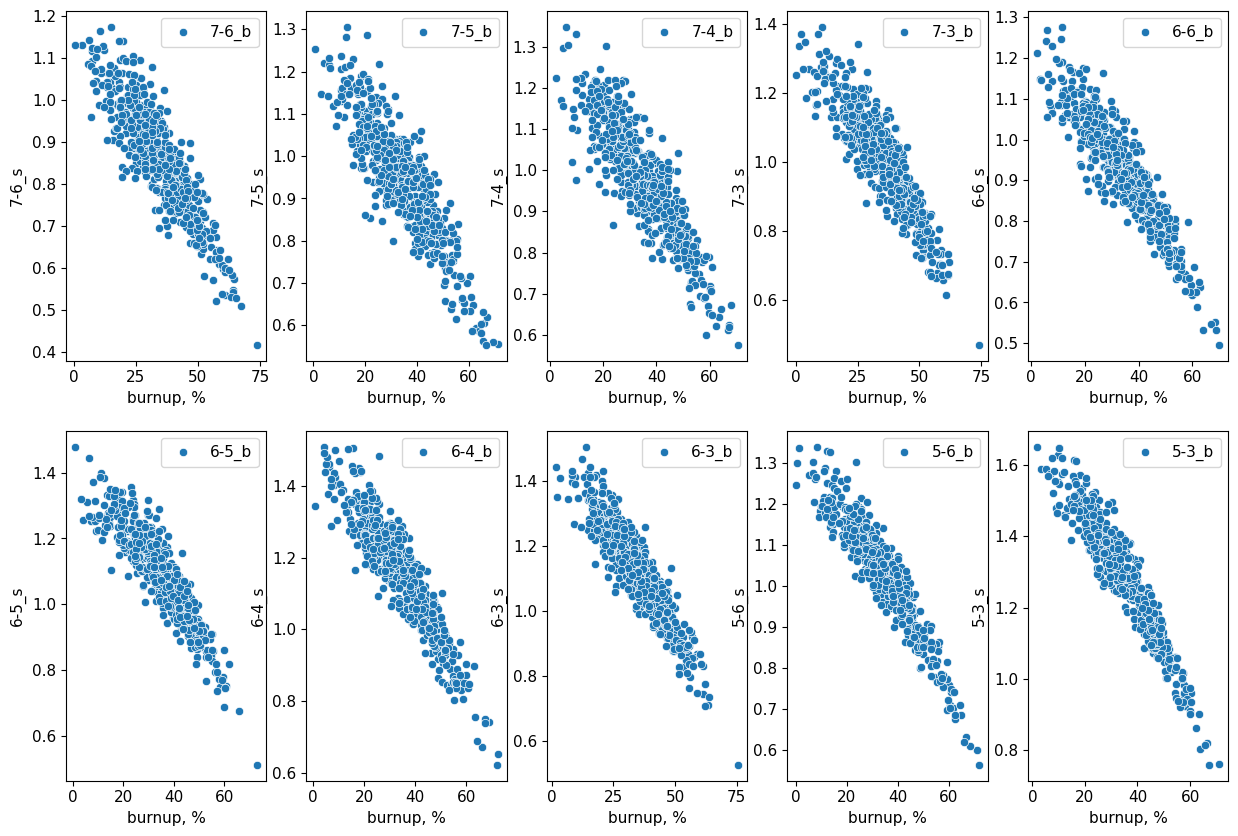

In [16]:
fig, axs = plt.subplots(2,5, figsize=(15,10))
cols1_b = [f"{i}_b" for i in d.CORE_PARTS["default"]["ALL_CELLS"][:10]]
cols1_t = [f"{i}_t" for i in d.CORE_PARTS["default"]["ALL_CELLS"][:10]]
cols1_s = [f"{i}_s" for i in d.CORE_PARTS["default"]["ALL_CELLS"][:10]]
print(axs)
for n in range(2):
    for e in range(5):
        if n == 1:
            e +=5
        print(cols1_b[e])
        sns.scatterplot(x=df[cols1_b[e]]/df[cols1_t[e]]*100, y=df[cols1_s[e]], ax=axs[n][e-5], label=cols1_b[e])
        axs[n][e-5].set_xlabel("burnup, %")

[[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]]
4-6_b
4-3_b
3-6_b
3-5_b
3-4_b
3-3_b
2-6_b
2-5_b
2-4_b
2-3_b


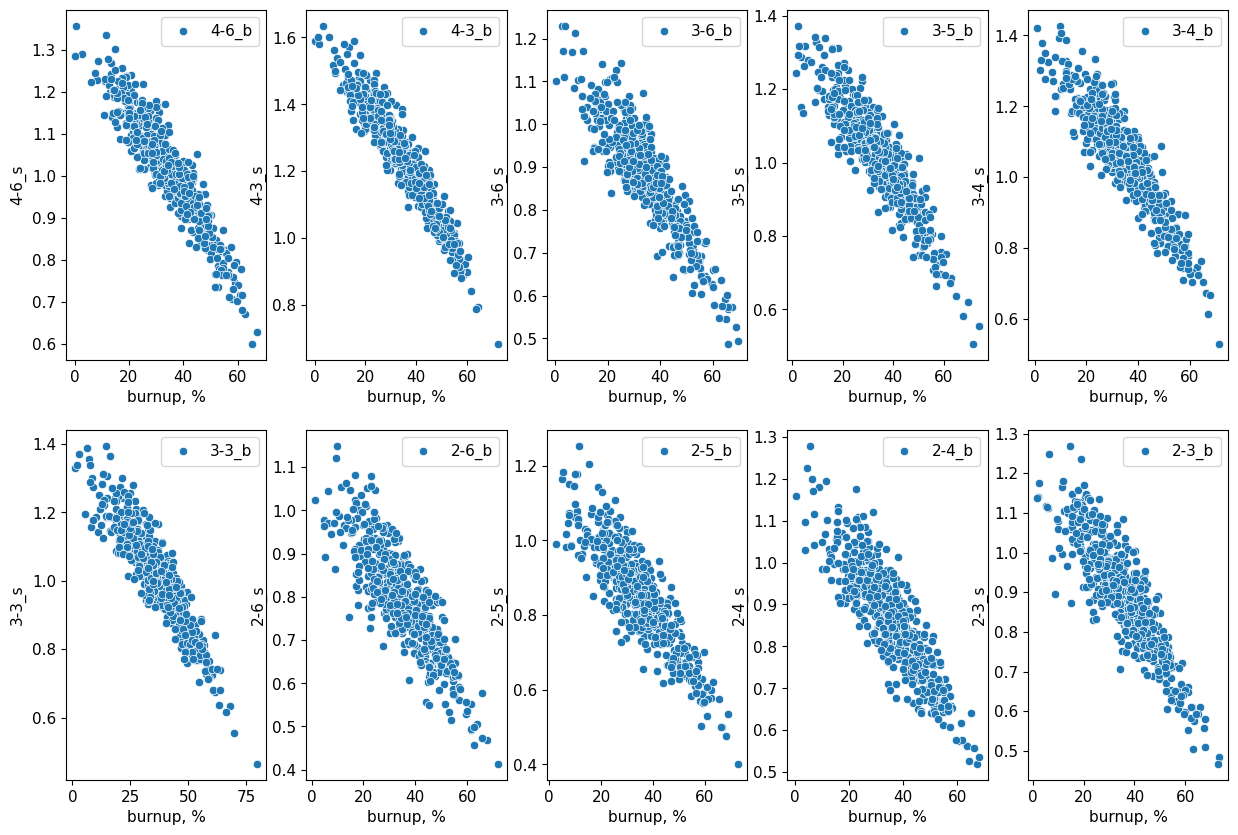

In [17]:
fig, axs = plt.subplots(2,5, figsize=(15,10))
cols1_b = [f"{i}_b" for i in d.CORE_PARTS["default"]["ALL_CELLS"][10:]]
cols1_t = [f"{i}_t" for i in d.CORE_PARTS["default"]["ALL_CELLS"][10:]]
cols1_s = [f"{i}_s" for i in d.CORE_PARTS["default"]["ALL_CELLS"][10:]]
print(axs)
for n in range(2):
    for e in range(5):
        if n == 1:
            e +=5
        print(cols1_b[e])
        sns.scatterplot(x=df[cols1_b[e]]/df[cols1_t[e]]*100, y=df[cols1_s[e]], ax=axs[n][e-5], label=cols1_b[e])
        axs[n][e-5].set_xlabel("burnup, %")

<Axes: xlabel='average_p', ylabel='p_mar'>

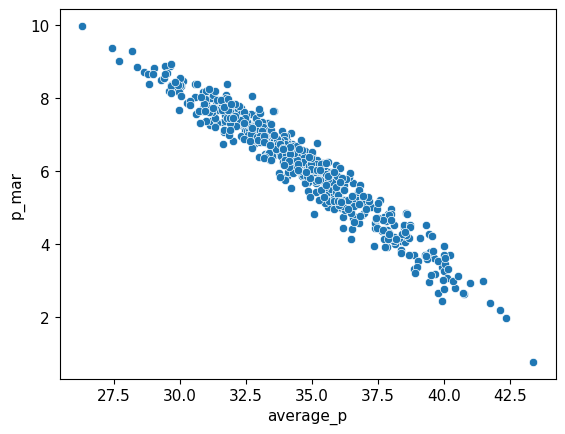

In [18]:
sns.scatterplot(x=d.df["average_p"], y=d.df["p_mar"])

In [19]:
from main.graph import Graphs

In [20]:
graph = Graphs(df=df)
graph._make_graph()
graphs = graph.graph

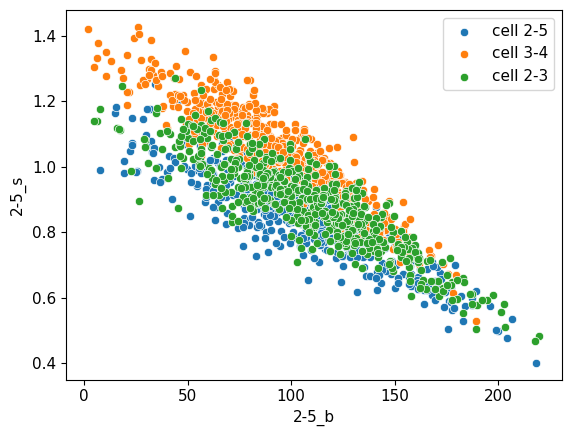

In [21]:
pairs76 = graphs["2-4"]

for i in pairs76:
    sns.scatterplot(x=df[i+"_b"], y=df[i+"_s"], label=f"cell {i}")

<Axes: xlabel='7-6_b', ylabel='7-6_s'>

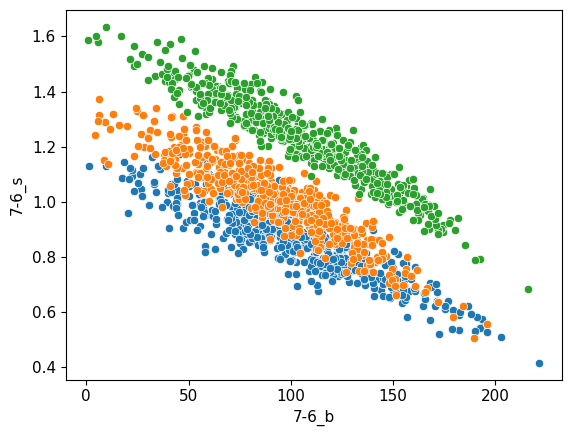

In [22]:
sns.scatterplot(x=df["7-6_b"], y=df["7-6_s"])
sns.scatterplot(x=df["3-5_b"], y=df["3-5_s"])
sns.scatterplot(x=df["4-3_b"], y=df["4-3_s"])

## Errors of augmented core data
### True cores were compared to artifically created

Text(0, 0.5, 'Mean Absoulte Error, %')

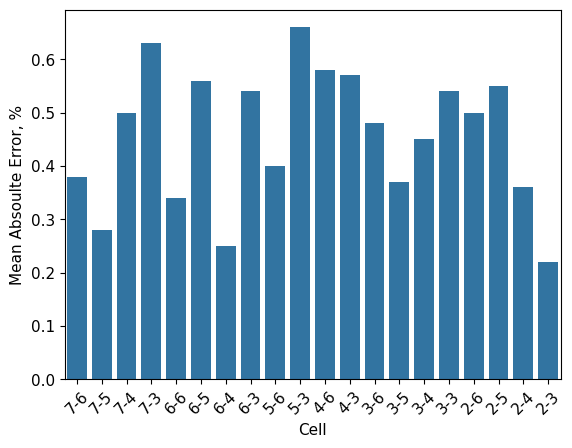

In [23]:
error_by_cells =[
    0.38, 0.28, 0.50, 0.63,
    0.34, 0.56, 0.25, 0.54,
    0.40, 0.66,
    0.58, 0.57, 
    0.48, 0.37, 0.45,0.54,
    0.50, 0.55, 0.36, 0.22

]
# cm = 1/2.54  # centimeters in inches
# fig, ax = plt.subplots(figsize=(14*cm, 12*cm))

sns.barplot(
    x=d.CORE_PARTS["default"]["ALL_CELLS"],
    y=error_by_cells
)
# Replace points with commas in tick labels
# plt.xticks([tick for tick in plt.xticks()[0]], [
#            str(tick).replace('.', ',') for tick in plt.xticks()[0]])
# plt.yticks([tick for tick in plt.yticks()[0]], [
#            str(round(float(tick), 2)).replace('.', ',') for tick in plt.yticks()[0]])
plt.xticks(rotation=45)
# plt.xlabel("Топливная ячейка")
# plt.ylabel("САО, %")
plt.xlabel("Cell")
plt.ylabel("Mean Absoulte Error, %")



In [24]:
from scipy.stats import (
    norm, 
    kendalltau,
    pearsonr,
    spearmanr,
    wilcoxon, 
    mannwhitneyu, 
    boxcox,
    ttest_ind,
    ttest_1samp,
    skew,
    kurtosis,
    kstest,
    zscore,
    shapiro,
    jarque_bera
)
import random

In [25]:
# df = df.sample(frac=0.25)
# df.info()

mean: 34.50550274223034
 median: 33.69
 skewness: 0.06239240567270274
 kurtosis: -0.2612861567101943
 std.dev: 12.275027393360967

mean: 385.0432515265317
 median: 386.986906549244
 skewness: -0.3745451185169125
 kurtosis: 0.05047229530307451
 std.dev: 48.27144454200157



Text(453.4267676767676, 0.5, 'Density')

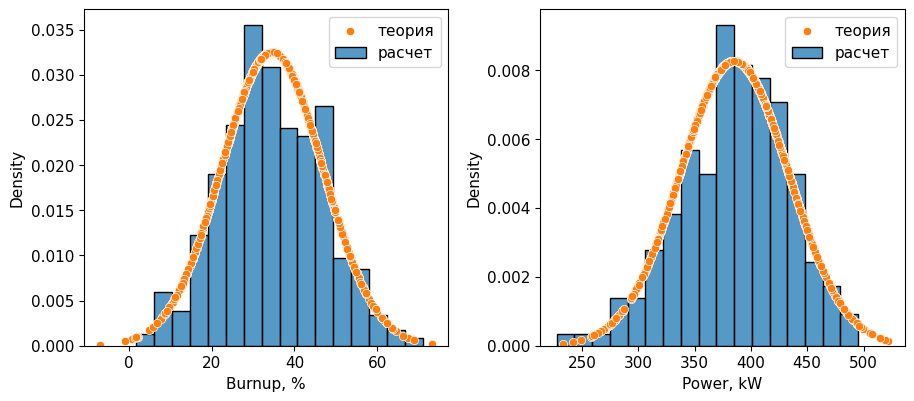

In [26]:
fig, axs = plt.subplots(1,2, figsize=(9,4))
fig.tight_layout(w_pad=3)

cell = "5-3"
cells_p=df[f"{cell}_p"]

fit_p = norm.fit(cells_p)
norm_p = norm.rvs(*fit_p, size=1000)
sns.histplot(cells_p, ax=axs[0], stat="density", label="расчет")

sns.scatterplot(
    x=norm_p, 
    y=norm.pdf(norm_p, *fit_p), 
    ax=axs[0], 
    label="теория"
)
print(
    f"mean: {cells_p.mean()}\n",
    f"median: {cells_p.median()}\n",
    f"skewness: {skew(cells_p)}\n",
    f"kurtosis: {kurtosis(cells_p)}\n",
    f"std.dev: {np.std(cells_p)}\n",

)

cells_s=df[f"{cell}_s"] *300
fit_s = norm.fit(cells_s)
norm_s = norm.rvs(*fit_s, size=1000)
sns.histplot(cells_s, ax=axs[1], stat="density", label="расчет")
sns.scatterplot(x=norm_s, y=norm.pdf(norm_s, *fit_s), ax=axs[1], label="теория")
print(
    f"mean: {cells_s.mean()}\n",
    f"median: {cells_s.median()}\n",
    f"skewness: {skew(cells_s)}\n",
    f"kurtosis: {kurtosis(cells_s)}\n",
    f"std.dev: {np.std(cells_s)}\n"

)

# axs[0].set_xlabel(f"Глубина выгорания, %") # в яч.{cell}, %")
# axs[0].set_ylabel(f"Плотность распределения вероятности")

axs[0].set_xlabel(f"Burnup, %") # в яч.{cell}, %")
axs[0].set_ylabel(f"Density")

# axs[0].set_xlabel(f"Глубина выгорания, %") # в яч.{cell}, %")
# axs[0].set_ylabel(f"Плотность распределения вероятности")

# axs[1].set_xlabel(f"КНРЭ") # в яч.{cell}")
# # axs[1].set_xlabel(f"Энерговыделение, кВт") # в яч.{cell}")
# axs[1].set_ylabel(f"Плотность распределения вероятности")

axs[1].set_xlabel(f"Power, kW") # в яч.{cell}")
axs[1].set_ylabel(f"Density")

# axs[0].get_legend().remove()
# axs[1].get_legend().remove()

# ty0 = [tick for tick in axs[0].get_yticks()]
# ty1 = [tick for tick in axs[1].get_yticks()]
# tx1 = [tick for tick in axs[1].get_xticks()]

# axs[0].set_yticks(ty0, [
#            str("{:.3f}".format(float(tick))).replace('.', ',') for tick in ty0])
# axs[1].set_yticks(ty1, [
#            str("{:.1f}".format(float(tick))).replace('.', ',') for tick in ty1])
# axs[1].set_xticks(tx1, [
#            str("{:.1f}".format(float(tick))).replace('.', ',') for tick in tx1])


Text(453.4267676767676, 0.5, 'Power, kW')

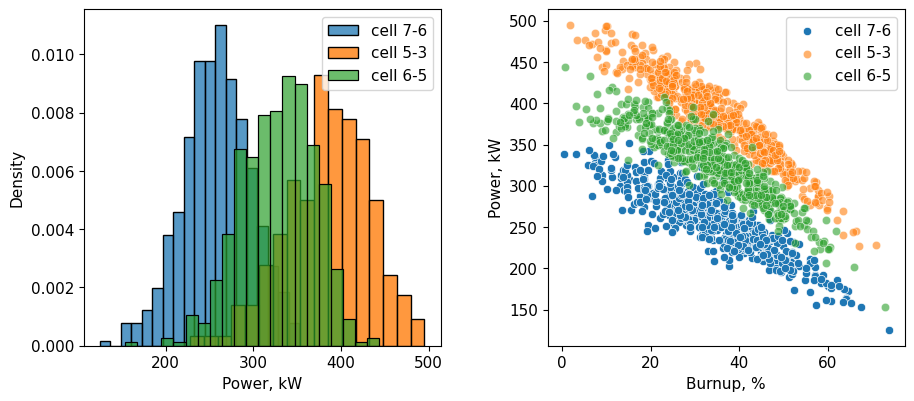

In [27]:
cell_rus = "ячейка"
cell_eng = "cell"

# xlab1_rus = "Энерговыделение, кВт"
xlab1_rus = "КНРЭ"
ylab1_rus = "Плотность распределения вероятности"
# xlab1_eng = "PDD, rel.units"
xlab1_eng = "Power, kW"
ylab1_eng = "Density"


xlab2_rus = "Глубина выгорания, %"
# ylab2_rus = "Энерговыделение, кВт"
ylab2_rus = "КНРЭ"
xlab2_eng = "Burnup, %"
# ylab2_eng = "PDD, rel.units"
ylab2_eng = "Power, kW"

fig, axs = plt.subplots(1,2, figsize=(9,4))
fig.tight_layout(w_pad=4)

cell1 = "7-6"
cell2 = "5-3"
cell3 = "6-5"
cells1_s=df[f"{cell1}_s"]*300
cells2_s=df[f"{cell2}_s"]*300
cells3_s=df[f"{cell3}_s"]*300

sns.histplot(cells1_s, stat="density", label=f"{cell_eng} {cell1}", ax=axs[0])
sns.histplot(cells2_s, stat="density", label=f"{cell_eng} {cell2}", alpha=0.8, ax=axs[0])
sns.histplot(cells3_s, stat="density", label=f"{cell_eng} {cell3}", alpha=0.7, ax=axs[0])

# axs[0].set_xlabel(f"КНРЭ")
axs[0].set_xlabel(xlab1_eng)
axs[0].set_ylabel(ylab1_eng)

axs[0].legend()

cells1_p=df[f"{cell1}_p"]
cells2_p=df[f"{cell2}_p"]
cells3_p=df[f"{cell3}_p"]


sns.scatterplot(x=cells1_p, y=cells1_s, label=f"{cell_eng} {cell1}", ax=axs[1])
sns.scatterplot(x=cells2_p, y=cells2_s, label=f"{cell_eng} {cell2}", alpha=0.6, ax=axs[1])
sns.scatterplot(x=cells3_p, y=cells3_s, label=f"{cell_eng} {cell3}", alpha=0.6, ax=axs[1])

axs[1].set_xlabel(xlab2_eng)
# axs[1].set_ylabel(f"КНРЭ")
axs[1].set_ylabel(ylab2_eng)

# axs[0].get_legend().remove()
# axs[1].get_legend().remove()

# tx0 = [tick for tick in axs[0].get_xticks()]
# ty0 = [tick for tick in axs[0].get_yticks()]
# ty1 = [tick for tick in axs[1].get_yticks()]


# axs[0].set_xticks(tx0, [
#            str("{:.1f}".format(float(tick))).replace('.', ',') for tick in tx0])
# axs[0].set_yticks(ty0, [
#            str("{:.1f}".format(float(tick))).replace('.', ',') for tick in ty0])
# axs[1].set_yticks(ty1, [
#            str("{:.1f}".format(float(tick))).replace('.', ',') for tick in ty1])



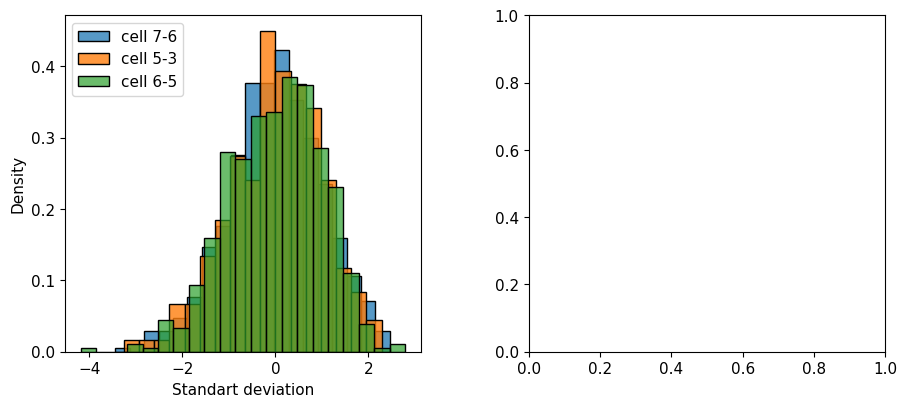

In [28]:
fig, axs  = plt.subplots(1,2, figsize=(9,4))
fig.tight_layout(w_pad=4)

mu1, sig1 = cells1_s.mean(), cells1_s.std()
mu2, sig2 = cells2_s.mean(), cells2_s.std()
mu3, sig3 = cells3_s.mean(), cells3_s.std()
# mu4, sig4 = cells4_s.mean(), cells4_s.std()

cells1_s_st = ( cells1_s - mu1 ) / sig1
cells2_s_st = ( cells2_s - mu2 ) / sig2
cells3_s_st = ( cells3_s - mu3 ) / sig3


sns.histplot(cells1_s_st, stat="density", label=f"{cell_eng} {cell1}", ax=axs[0])
sns.histplot(cells2_s_st, stat="density", label=f"{cell_eng} {cell2}", alpha=0.8, ax=axs[0])
sns.histplot(cells3_s_st, stat="density", label=f"{cell_eng} {cell3}", alpha=0.7, ax=axs[0])

axs[0].set_xlabel("Standart deviation")
axs[0].legend()
# sns.histplot(cells4_s, stat="density", label=f"{cell_eng} {cell4}", alpha=0.5, ax=axs[0])

257.54866565424453 277.91660578319386 263.2775784380282 237.63523393685844


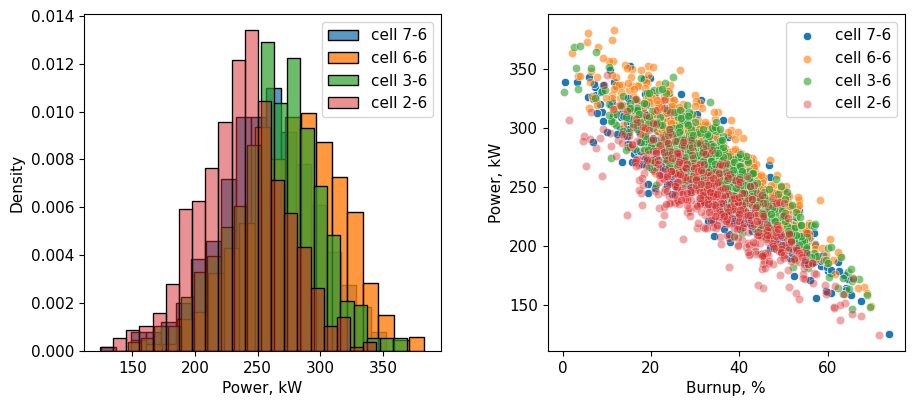

In [29]:
cell_rus = "ячейка"
cell_eng = "cell"

# xlab1_rus = "Энерговыделение, кВт"
xlab1_rus = "КНРЭ"
ylab1_rus = "Плотность распределения вероятности"
# xlab1_eng = "PDD, rel.units"
xlab1_eng = "Power, kW"
ylab1_eng = "Density"


xlab2_rus = "Глубина выгорания, %"
# ylab2_rus = "Энерговыделение, кВт"
ylab2_rus = "КНРЭ"
xlab2_eng = "Burnup, %"
# ylab2_eng = "PDD, rel.units"
ylab2_eng = "Power, kW"

fig, axs = plt.subplots(1,2, figsize=(9,4))
fig.tight_layout(w_pad=4)

cell1 = "7-6"
cell2 = "6-6"
cell3 = "3-6"
cell4 = "2-6"

cells1_s=df[f"{cell1}_s"]*300
cells2_s=df[f"{cell2}_s"]*300
cells3_s=df[f"{cell3}_s"]*300
cells4_s=df[f"{cell4}_s"]*300

sns.histplot(cells1_s, stat="density", label=f"{cell_eng} {cell1}", ax=axs[0])
sns.histplot(cells2_s, stat="density", label=f"{cell_eng} {cell2}", alpha=0.8, ax=axs[0])
sns.histplot(cells3_s, stat="density", label=f"{cell_eng} {cell3}", alpha=0.7, ax=axs[0])
sns.histplot(cells4_s, stat="density", label=f"{cell_eng} {cell4}", alpha=0.5, ax=axs[0])

# axs[0].set_xlabel(f"КНРЭ")
axs[0].set_xlabel(xlab1_eng)
axs[0].set_ylabel(ylab1_eng)

axs[0].legend()

cells1_p=df[f"{cell1}_p"]
cells2_p=df[f"{cell2}_p"]
cells3_p=df[f"{cell3}_p"]
cells4_p=df[f"{cell4}_p"]


sns.scatterplot(x=cells1_p, y=cells1_s, label=f"{cell_eng} {cell1}", ax=axs[1])
sns.scatterplot(x=cells2_p, y=cells2_s, label=f"{cell_eng} {cell2}", alpha=0.6, ax=axs[1])
sns.scatterplot(x=cells3_p, y=cells3_s, label=f"{cell_eng} {cell3}", alpha=0.6, ax=axs[1])
sns.scatterplot(x=cells4_p, y=cells4_s, label=f"{cell_eng} {cell4}", alpha=0.4, ax=axs[1])

axs[1].set_xlabel(xlab2_eng)
# axs[1].set_ylabel(f"КНРЭ")
axs[1].set_ylabel(ylab2_eng)

# axs[0].get_legend().remove()
# axs[1].get_legend().remove()

# tx0 = [tick for tick in axs[0].get_xticks()]
# ty0 = [tick for tick in axs[0].get_yticks()]
# ty1 = [tick for tick in axs[1].get_yticks()]


# axs[0].set_xticks(tx0, [
#            str("{:.1f}".format(float(tick))).replace('.', ',') for tick in tx0])
# axs[0].set_yticks(ty0, [
#            str("{:.1f}".format(float(tick))).replace('.', ',') for tick in ty0])
# axs[1].set_yticks(ty1, [
#            str("{:.1f}".format(float(tick))).replace('.', ',') for tick in ty1])

print(cells1_s.mean(), cells2_s.mean(), cells3_s.mean(), cells4_s.mean())

Text(453.4267676767676, 0.5, 'Power, kW')

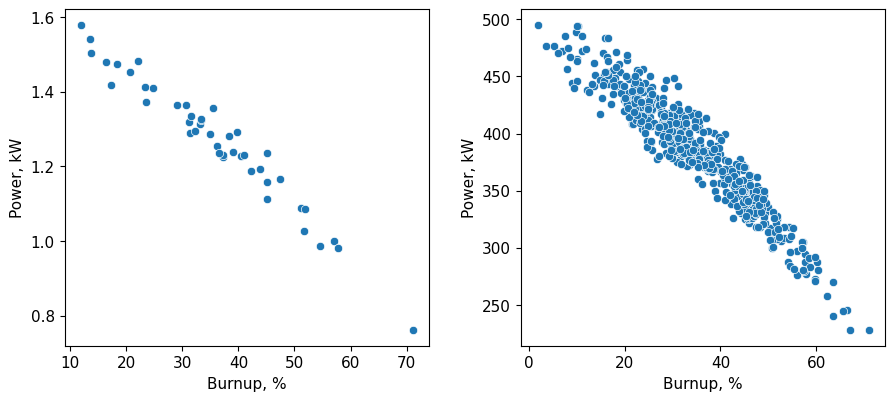

In [30]:
fig, axs = plt.subplots(1,2, figsize=(9,4))
fig.tight_layout(w_pad=3)
portion = df.sample(frac=0.08)
sns.scatterplot(
    x=df.loc[portion.index, f"{cell}_p"],
    y=df.loc[portion.index, f"{cell}_s"],
    ax=axs[0]
)
sns.scatterplot(
    x=cells_p,
    y=cells_s,
    ax=axs[1]
)

# axs[0].set_xlabel("Глубина выгорания, %")
# axs[0].set_ylabel("КНРЭ")
axs[0].set_xlabel("Burnup, %")
axs[0].set_ylabel("Power, kW")

# axs[1].set_xlabel("Глубина выгорания, %")
# axs[1].set_ylabel("КНРЭ")
axs[1].set_xlabel("Burnup, %")
axs[1].set_ylabel("Power, kW")

# ty0 = [tick for tick in axs[0].get_yticks()]
# ty0 = [tick for tick in axs[1].get_yticks()]

# axs[0].set_yticks(ty0, [
#            str("{:.1f}".format(float(tick))).replace('.', ',') for tick in ty0])
# axs[1].set_yticks(ty1, [
#            str("{:.1f}".format(float(tick))).replace('.', ',') for tick in ty1])


mean 34.35659090909092 median 34.935
mean 385.48358389392973 median 387.54990128367274


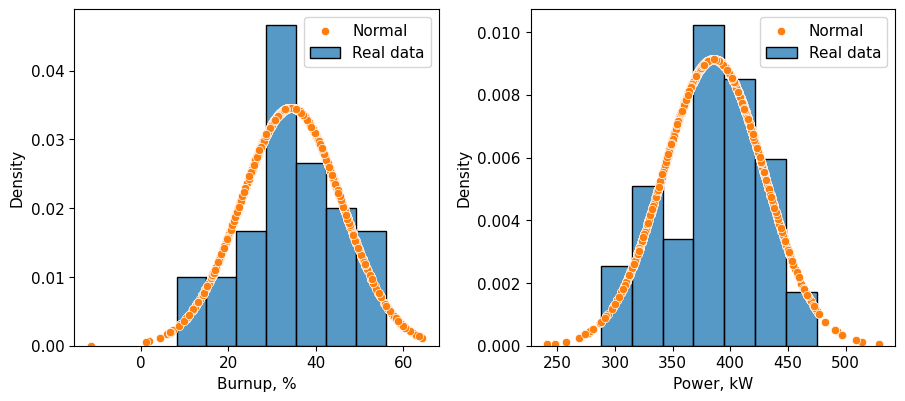

In [98]:
fig, axs = plt.subplots(1,2, figsize=(9,4))
fig.tight_layout(w_pad=3)

cell = "5-3"
cells_por_p=df[f"{cell}_p"].loc[portion.index]
fit_p = norm.fit(cells_por_p)
norm_p = norm.rvs(*fit_p, size=1000)

mean_p, median_p = cells_por_p.mean(), cells_por_p.median()
print(
    "mean", mean_p,
    "median", median_p,
)
# sns.histplot(cells_por_p, ax=axs[0], stat="density", label="расчет")
sns.histplot(cells_por_p, ax=axs[0], stat="density", label="Real data")

sns.scatterplot(
    x=norm_p, 
    y=norm.pdf(norm_p, *fit_p), 
    ax=axs[0], 
    # label="теория",
    label="Normal"
)
# sns.lineplot(
#     x=[mean_p, mean_p],
#     y=[0,1],
#     ax=axs[0],
#     color="black",
#     estimator=None,
#     linewidth=2,
#     label="среднее"
# )

# sns.lineplot(
#     x=[median_p, median_p],
#     y=[0,1],
#     ax=axs[0],
#     color="red",
#     estimator=None,
#     linewidth=2,
#     label="медиана"
# )

cells_por_s=df[f"{cell}_s"].loc[portion.index] *300
fit_s = norm.fit(cells_por_s)
norm_s = norm.rvs(*fit_s, size=1000)

mean_s, median_s = cells_por_s.mean(), cells_por_s.median()
print(
    "mean", mean_s,
    "median", median_s,
)

# sns.histplot(cells_por_s, ax=axs[1], stat="density", label="расчет")
# sns.scatterplot(x=norm_s, y=norm.pdf(norm_s, *fit_s), ax=axs[1], label="теория")

sns.histplot(cells_por_s, ax=axs[1], stat="density", label="Real data")
sns.scatterplot(x=norm_s, y=norm.pdf(norm_s, *fit_s), ax=axs[1], label="Normal")

# sns.lineplot(
#     x=[mean_s, mean_s],
#     # y=[0,1],
#     y=[0,3],
#     ax=axs[1],
#     color="black",
#     estimator=None,
#     linewidth=2,
#     label="среднее"
# )

# sns.lineplot(
#     x=[median_s, median_s],
#     # y=[0,1],
#     y=[0,3],
#     ax=axs[1],
#     color="red",
#     estimator=None,
#     linewidth=2,
#     label="медиана"
# )

# axs[0].set_xlabel(f"Глубина выгорания, %") # в яч.{cell}, %")
# axs[0].set_ylabel(f"Плотность распределения вероятности")
axs[0].set_xlabel(f"Burnup, %") # в яч.{cell}, %")
axs[0].set_ylabel(f"Density")

# axs[0].set_ylim(0, 0.045)
axs[0].legend()

# axs[1].set_xlabel(f"КНРЭ") # в яч.{cell}")
# axs[1].set_xlabel(f"Энерговыделение. кВт") # в яч.{cell}")
# axs[1].set_ylabel(f"Плотность распределения вероятности")

axs[1].set_xlabel(f"Power, kW") # в яч.{cell}")
axs[1].set_ylabel(f"Density")

# axs[1].set_ylim(0, 0.01)
# axs[1].set_ylim(0, 3)
axs[1].legend()

# axs[0].get_legend().remove()
# axs[1].get_legend().remove()


# ty0 = [tick for tick in axs[0].get_yticks()]
# tx1 = [tick for tick in axs[1].get_xticks()]
# ty1 = [tick for tick in axs[1].get_yticks()]



# axs[0].set_yticks(ty0, [
#            str("{:.3f}".format(float(tick))).replace('.', ',') for tick in ty0])
# axs[1].set_xticks(tx1, [
#            str("{:.1f}".format(float(tick))).replace('.', ',') for tick in tx1])
# axs[1].set_yticks(ty1, [
#            str("{:.1f}".format(float(tick))).replace('.', ',') for tick in ty1])

# Save just the portion _inside_ the second axis's boundaries
# extent = axs[0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
# fig.savefig("fig4a.png", bbox_inches=extent)

NameError: name 'sm' is not defined

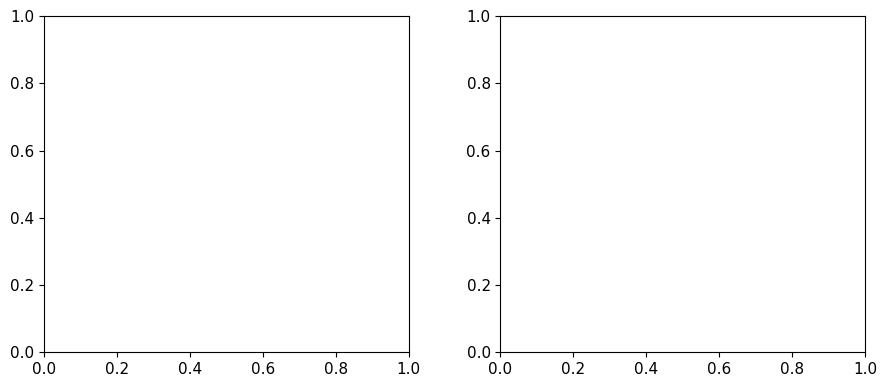

In [99]:
fig, axs = plt.subplots(1,2, figsize=(9,4))
fig.tight_layout(w_pad=3)
sm.qqplot(cells_p.to_numpy(), fit=True, line="45", ax=axs[0], label =f"Глубина выгорания в яч.{cell}.");
axs[0].set_xlabel(f"Теоретические квантили")
axs[0].set_ylabel(f"Квантили выборки данных")

sm.qqplot(cells_s.to_numpy(), fit=True, line="45", ax=axs[1]);
axs[1].set_xlabel(f"Теоретические квантили")
axs[1].set_ylabel(f"Квантили выборки данных")

# Some statistical tests

In [72]:
for cell in d.CORE_PARTS["percentage"]["ALL_CELLS"]:
    print(
        shapiro(
            df.loc[:, cell]
        ),
        cell
    )

ShapiroResult(statistic=0.9978803992271423, pvalue=0.7326451539993286) 7-6_p
ShapiroResult(statistic=0.9958581924438477, pvalue=0.1596265286207199) 7-5_p
ShapiroResult(statistic=0.9946500062942505, pvalue=0.05328715965151787) 7-4_p
ShapiroResult(statistic=0.9963958859443665, pvalue=0.2545062303543091) 7-3_p
ShapiroResult(statistic=0.9964784979820251, pvalue=0.27277830243110657) 6-6_p
ShapiroResult(statistic=0.997357189655304, pvalue=0.5351967215538025) 6-5_p
ShapiroResult(statistic=0.9972987771034241, pvalue=0.5141986608505249) 6-4_p
ShapiroResult(statistic=0.9971383810043335, pvalue=0.45873963832855225) 6-3_p
ShapiroResult(statistic=0.996934711933136, pvalue=0.3937574625015259) 5-6_p
ShapiroResult(statistic=0.9969496130943298, pvalue=0.3982720971107483) 5-3_p
ShapiroResult(statistic=0.9976112842559814, pvalue=0.6301881670951843) 4-6_p
ShapiroResult(statistic=0.9960651993751526, pvalue=0.19153498113155365) 4-3_p
ShapiroResult(statistic=0.9971243739128113, pvalue=0.4540521800518036) 3-6

In [73]:
for cell in d.CORE_PARTS["coef"]["ALL_CELLS"]:
    print(
        shapiro(
            df.loc[:, cell]
        ),
        cell
    )

ShapiroResult(statistic=0.9963722825050354, pvalue=0.24947933852672577) 7-6_s
ShapiroResult(statistic=0.9911182522773743, pvalue=0.0022755535319447517) 7-5_s
ShapiroResult(statistic=0.9937880635261536, pvalue=0.024172808974981308) 7-4_s
ShapiroResult(statistic=0.995220422744751, pvalue=0.08985200524330139) 7-3_s
ShapiroResult(statistic=0.9951514005661011, pvalue=0.084369957447052) 6-6_s
ShapiroResult(statistic=0.9914596676826477, pvalue=0.003047791076824069) 6-5_s
ShapiroResult(statistic=0.9877890944480896, pvalue=0.00015577397425659) 6-4_s
ShapiroResult(statistic=0.9929325580596924, pvalue=0.011135716922581196) 6-3_s
ShapiroResult(statistic=0.9838944673538208, pvalue=9.615159797249362e-06) 5-6_s
ShapiroResult(statistic=0.9900308847427368, pvalue=0.0009167797979898751) 5-3_s
ShapiroResult(statistic=0.9931588768959045, pvalue=0.013651466928422451) 4-6_s
ShapiroResult(statistic=0.9963128566741943, pvalue=0.23719628155231476) 4-3_s
ShapiroResult(statistic=0.9927939772605896, pvalue=0.0098

In [669]:
for cell in d.CORE_PARTS["coef"]["ALL_CELLS"]:
    print(
        jarque_bera(
            df.loc[:, cell]
        ),
        cell
    )

SignificanceResult(statistic=3.00152015048505, pvalue=0.22296062887426427) 7-6_s
SignificanceResult(statistic=9.229070125872797, pvalue=0.009906788369469783) 7-5_s
SignificanceResult(statistic=4.571613822808615, pvalue=0.10169197257884946) 7-4_s
SignificanceResult(statistic=3.8849240588752636, pvalue=0.1433505816029682) 7-3_s
SignificanceResult(statistic=5.4811804731236125, pvalue=0.06453224635889392) 6-6_s
SignificanceResult(statistic=10.781418637540165, pvalue=0.004558738589788075) 6-5_s
SignificanceResult(statistic=17.040331469158346, pvalue=0.0001994063740938343) 6-4_s
SignificanceResult(statistic=8.73824017625561, pvalue=0.012662377443795145) 6-3_s
SignificanceResult(statistic=29.06868575511718, pvalue=4.873209589987581e-07) 5-6_s
SignificanceResult(statistic=12.847289532894624, pvalue=0.0016227309678559993) 5-3_s
SignificanceResult(statistic=7.108966864926001, pvalue=0.02859614294073839) 4-6_s
SignificanceResult(statistic=3.1796963600867776, pvalue=0.20395657406202902) 4-3_s
Sign

In [670]:
med_e, med_t = cells_s.median(), norm_s.mean()
std_e, std_t = np.std(cells_s), np.std(norm_s)

std = np.sqrt(
    (
        ( len(cells_p) - 1 ) * std_e**2
        + ( len(norm_p) - 1 ) * std_t**2
    ) / (len(cells_p) + len(norm_p) - 2)
)

(med_e - med_t) / std

0.12693063389707543

# Correlations

## Heat map and kendall tests on 7-6... -> 2-3... cells

<Axes: >

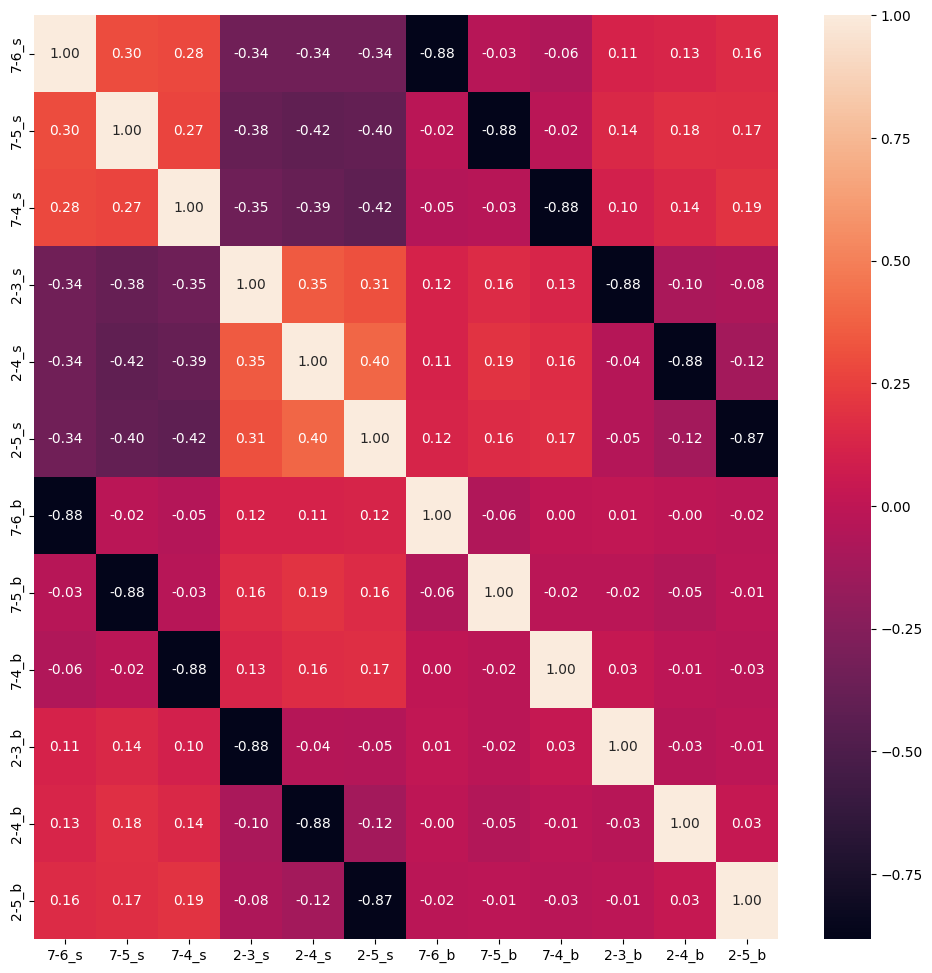

In [671]:
fig,ax = plt.subplots(1,1, figsize=(12,12))
sns.heatmap(
    df.loc[
        :, 
        [
            *d.CORE_PARTS["coef"]["ALL_CELLS"][:3],
            *d.CORE_PARTS["coef"]["ALL_CELLS"][::-1][:3],
            *d.CORE_PARTS["burnup"]["ALL_CELLS"][:3],
            *d.CORE_PARTS["burnup"]["ALL_CELLS"][::-1][:3],
        ]
    ].corr(method="pearson"),
    annot=True,
    fmt=".2f"
)

In [672]:
pearsonr(
    df.loc[:, "7-6_s"],
    df.loc[:, "7-5_s"]
), pearsonr(
    df.loc[:, "7-6_s"],
    df.loc[:, "7-4_s"]
), pearsonr(
    df.loc[:, "7-6_s"],
    df.loc[:, "2-3_s"]
), pearsonr(
    df.loc[:, "7-6_s"],
    df.loc[:, "2-4_s"]
), pearsonr(
    df.loc[:, "7-6_s"],
    df.loc[:, "2-5_s"]
), pearsonr(
    df.loc[:, "7-6_s"],
    df.loc[:, "7-6_p"]
), pearsonr(
    df.loc[:, "7-6_s"],
    df.loc[:, "7-5_p"]
), pearsonr(
    df.loc[:, "7-6_s"],
    df.loc[:, "7-4_p"]
),pearsonr(
    df.loc[:, "7-6_s"],
    df.loc[:, "2-3_p"]
), pearsonr(
    df.loc[:, "7-6_s"],
    df.loc[:, "2-4_p"]
), pearsonr(
    df.loc[:, "7-6_s"],
    df.loc[:, "2-5_p"]
)

(PearsonRResult(statistic=0.29762394459661545, pvalue=1.1894913232141877e-12),
 PearsonRResult(statistic=0.2829480811785364, pvalue=1.576379233229155e-11),
 PearsonRResult(statistic=-0.34158786984788175, pvalue=2.0468772190387566e-16),
 PearsonRResult(statistic=-0.3384705442837573, pvalue=3.968659435085776e-16),
 PearsonRResult(statistic=-0.34343504866943375, pvalue=1.377735965477288e-16),
 PearsonRResult(statistic=-0.8826483222565015, pvalue=7.906286057109423e-181),
 PearsonRResult(statistic=-0.03398624211018809, pvalue=0.42761346752631935),
 PearsonRResult(statistic=-0.06029008562848362, pvalue=0.15909498252733265),
 PearsonRResult(statistic=0.11487392872500833, pvalue=0.007157261088536164),
 PearsonRResult(statistic=0.13154825847321303, pvalue=0.0020490828035823997),
 PearsonRResult(statistic=0.1606642120864641, pvalue=0.00016093120994652545))

In [506]:
pearsonr(
    df.loc[:, "7-5_s"],
    df.loc[:, "7-4_s"]
), pearsonr(
    df.loc[:, "7-5_s"],
    df.loc[:, "2-3_s"]
), pearsonr(
    df.loc[:, "7-5_s"],
    df.loc[:, "2-4_s"]
), pearsonr(
    df.loc[:, "7-5_s"],
    df.loc[:, "2-5_s"]
), pearsonr(
    df.loc[:, "7-5_s"],
    df.loc[:, "7-6_p"]
), pearsonr(
    df.loc[:, "7-5_s"],
    df.loc[:, "7-5_p"]
), pearsonr(
    df.loc[:, "7-5_s"],
    df.loc[:, "7-4_p"]
), pearsonr(
    df.loc[:, "7-5_s"],
    df.loc[:, "2-3_p"]
),pearsonr(
    df.loc[:, "7-5_s"],
    df.loc[:, "2-4_p"]
), pearsonr(
    df.loc[:, "7-5_s"],
    df.loc[:, "2-5_p"]
)

(PearsonRResult(statistic=0.2533691228503931, pvalue=1.0762410939929591e-07),
 PearsonRResult(statistic=-0.3749882253342596, pvalue=9.746225635296619e-16),
 PearsonRResult(statistic=-0.4212411855617673, pvalue=7.728531605340056e-20),
 PearsonRResult(statistic=-0.39137357643657744, pvalue=4.066201665188355e-17),
 PearsonRResult(statistic=-0.050414803091254304, pvalue=0.29806068715727635),
 PearsonRResult(statistic=-0.8784486110516885, pvalue=1.0377275648204282e-138),
 PearsonRResult(statistic=-0.014109610887721748, pvalue=0.7710033478693727),
 PearsonRResult(statistic=0.13375493221884205, pvalue=0.005579615776317365),
 PearsonRResult(statistic=0.16344748305607104, pvalue=0.0006878093301962997),
 PearsonRResult(statistic=0.16357292890860914, pvalue=0.0006812056433193036))

In [507]:
pearsonr(
    df.loc[:, "7-4_s"],
    df.loc[:, "2-3_s"]
), pearsonr(
    df.loc[:, "7-4_s"],
    df.loc[:, "2-4_s"]
), pearsonr(
    df.loc[:, "7-4_s"],
    df.loc[:, "2-5_s"]
), pearsonr(
    df.loc[:, "7-4_s"],
    df.loc[:, "7-6_p"]
), pearsonr(
    df.loc[:, "7-4_s"],
    df.loc[:, "7-5_p"]
), pearsonr(
    df.loc[:, "7-4_s"],
    df.loc[:, "7-4_p"]
), pearsonr(
    df.loc[:, "7-4_s"],
    df.loc[:, "2-3_p"]
), pearsonr(
    df.loc[:, "7-4_s"],
    df.loc[:, "2-4_p"]
),pearsonr(
    df.loc[:, "7-4_s"],
    df.loc[:, "2-5_p"]
)

(PearsonRResult(statistic=-0.35357380830792934, pvalue=4.7627216660121586e-14),
 PearsonRResult(statistic=-0.3699820744463294, pvalue=2.483477207872632e-15),
 PearsonRResult(statistic=-0.4137002235703859, pvalue=3.991392489684654e-19),
 PearsonRResult(statistic=-0.06653930921586344, pvalue=0.169418917460265),
 PearsonRResult(statistic=-0.025839907936983597, pvalue=0.5939603310122092),
 PearsonRResult(statistic=-0.8854885890442972, pvalue=6.911910068682936e-144),
 PearsonRResult(statistic=0.11763082001275317, pvalue=0.014895607607527781),
 PearsonRResult(statistic=0.11630225087416667, pvalue=0.016074606847629735),
 PearsonRResult(statistic=0.19682362773450274, pvalue=4.1281732366242134e-05))

In [508]:
pearsonr(
    df.loc[:, "2-3_s"],
    df.loc[:, "2-4_s"]
), pearsonr(
    df.loc[:, "2-3_s"],
    df.loc[:, "2-5_s"]
), pearsonr(
    df.loc[:, "2-3_s"],
    df.loc[:, "7-6_p"]
), pearsonr(
    df.loc[:, "2-3_s"],
    df.loc[:, "7-5_p"]
), pearsonr(
    df.loc[:, "2-3_s"],
    df.loc[:, "7-4_p"]
), pearsonr(
    df.loc[:, "2-3_s"],
    df.loc[:, "2-3_p"]
), pearsonr(
    df.loc[:, "2-3_s"],
    df.loc[:, "2-4_p"]
), pearsonr(
    df.loc[:, "2-3_s"],
    df.loc[:, "2-5_p"]
)

(PearsonRResult(statistic=0.35613448065942965, pvalue=3.03737621057046e-14),
 PearsonRResult(statistic=0.26673651524354913, pvalue=2.094610747415728e-08),
 PearsonRResult(statistic=0.11870116280789861, pvalue=0.014001686278504604),
 PearsonRResult(statistic=0.14817699457391217, pvalue=0.0021154382916890027),
 PearsonRResult(statistic=0.14774909403392567, pvalue=0.002179951536527829),
 PearsonRResult(statistic=-0.8887744412543063, pvalue=2.0223628710914237e-146),
 PearsonRResult(statistic=-0.10965927307345338, pvalue=0.023276822581453496),
 PearsonRResult(statistic=-0.05095680142139975, pvalue=0.29288997699612246))

In [509]:
pearsonr(
    df.loc[:, "2-4_s"],
    df.loc[:, "2-5_s"]
), pearsonr(
    df.loc[:, "2-4_s"],
    df.loc[:, "7-6_p"]
), pearsonr(
    df.loc[:, "2-4_s"],
    df.loc[:, "7-5_p"]
), pearsonr(
    df.loc[:, "2-4_s"],
    df.loc[:, "7-4_p"]
), pearsonr(
    df.loc[:, "2-4_s"],
    df.loc[:, "2-3_p"]
), pearsonr(
    df.loc[:, "2-4_s"],
    df.loc[:, "2-4_p"]
), pearsonr(
    df.loc[:, "2-4_s"],
    df.loc[:, "2-5_p"]
)

(PearsonRResult(statistic=0.38227132728397867, pvalue=2.427528021713854e-16),
 PearsonRResult(statistic=0.1353418219303206, pvalue=0.005036336618421571),
 PearsonRResult(statistic=0.21012619859697368, pvalue=1.1681719848966089e-05),
 PearsonRResult(statistic=0.15118788886682233, pvalue=0.0017086018424260774),
 PearsonRResult(statistic=-0.06262140584943121, pvalue=0.19601026993102402),
 PearsonRResult(statistic=-0.8674385133172755, pvalue=3.1533470758631763e-131),
 PearsonRResult(statistic=-0.12241059628236743, pvalue=0.01125814324720173))

In [510]:
pearsonr(
    df.loc[:, "2-5_s"],
    df.loc[:, "7-6_p"]
), pearsonr(
    df.loc[:, "2-5_s"],
    df.loc[:, "7-5_p"]
), pearsonr(
    df.loc[:, "2-5_s"],
    df.loc[:, "7-4_p"]
), pearsonr(
    df.loc[:, "2-5_s"],
    df.loc[:, "2-3_p"]
), pearsonr(
    df.loc[:, "2-5_s"],
    df.loc[:, "2-4_p"]
), pearsonr(
    df.loc[:, "2-5_s"],
    df.loc[:, "2-5_p"]
)

(PearsonRResult(statistic=0.11138501919293785, pvalue=0.021178436087331103),
 PearsonRResult(statistic=0.16304249089548498, pvalue=0.0007095356870725416),
 PearsonRResult(statistic=0.17691724087811295, pvalue=0.0002346603393976042),
 PearsonRResult(statistic=-0.019258567355863183, pvalue=0.6911491969593481),
 PearsonRResult(statistic=-0.10539008015147985, pvalue=0.029255614561226717),
 PearsonRResult(statistic=-0.8851508067977758, pvalue=1.2463935024033998e-143))

In [511]:
pearsonr(
    df.loc[:, "7-6_p"],
    df.loc[:, "7-5_p"]
), pearsonr(
    df.loc[:, "7-6_p"],
    df.loc[:, "7-4_p"]
), pearsonr(
    df.loc[:, "7-6_p"],
    df.loc[:, "2-3_p"]
), pearsonr(
    df.loc[:, "7-6_p"],
    df.loc[:, "2-4_p"]
), pearsonr(
    df.loc[:, "7-6_p"],
    df.loc[:, "2-5_p"]
)

(PearsonRResult(statistic=-0.02083806747277882, pvalue=0.667277681755294),
 PearsonRResult(statistic=0.033152391668937846, pvalue=0.49394721473291825),
 PearsonRResult(statistic=0.0033662878692793346, pvalue=0.9446403190608701),
 PearsonRResult(statistic=-0.0247477686227634, pvalue=0.6096544825219742),
 PearsonRResult(statistic=-0.018989292813795793, pvalue=0.6952503523940798))

In [512]:
pearsonr(
    df.loc[:, "7-5_p"],
    df.loc[:, "7-4_p"]
), pearsonr(
    df.loc[:, "7-5_p"],
    df.loc[:, "2-3_p"]
), pearsonr(
    df.loc[:, "7-5_p"],
    df.loc[:, "2-4_p"]
), pearsonr(
    df.loc[:, "7-5_p"],
    df.loc[:, "2-5_p"]
)

(PearsonRResult(statistic=-0.021121274123991802, pvalue=0.6630318817376454),
 PearsonRResult(statistic=0.0011498998026998857, pvalue=0.9810761536174901),
 PearsonRResult(statistic=-0.04803665701341178, pvalue=0.321462867886666),
 PearsonRResult(statistic=-0.011825730151519711, pvalue=0.8072729106382057))

In [513]:
pearsonr(
    df.loc[:, "7-4_p"],
    df.loc[:, "2-3_p"]
), pearsonr(
    df.loc[:, "7-4_p"],
    df.loc[:, "2-4_p"]
), pearsonr(
    df.loc[:, "7-4_p"],
    df.loc[:, "2-5_p"]
)

(PearsonRResult(statistic=0.0034695754936835037, pvalue=0.942944566020859),
 PearsonRResult(statistic=0.011389045849431966, pvalue=0.8142576559503747),
 PearsonRResult(statistic=-0.038473966130003125, pvalue=0.42724094747592795))

In [514]:
pearsonr(
    df.loc[:, "2-3_p"],
    df.loc[:, "2-4_p"]
), pearsonr(
    df.loc[:, "2-3_p"],
    df.loc[:, "2-5_p"]
)

(PearsonRResult(statistic=-0.0020348274916635357, pvalue=0.9665196081981954),
 PearsonRResult(statistic=-0.03653191209233271, pvalue=0.45095763653256987))

In [515]:
pearsonr(
    df.loc[:, "2-4_p"],
    df.loc[:, "2-5_p"]
)

PearsonRResult(statistic=0.03235329552378971, pvalue=0.504422476694141)

<Axes: >

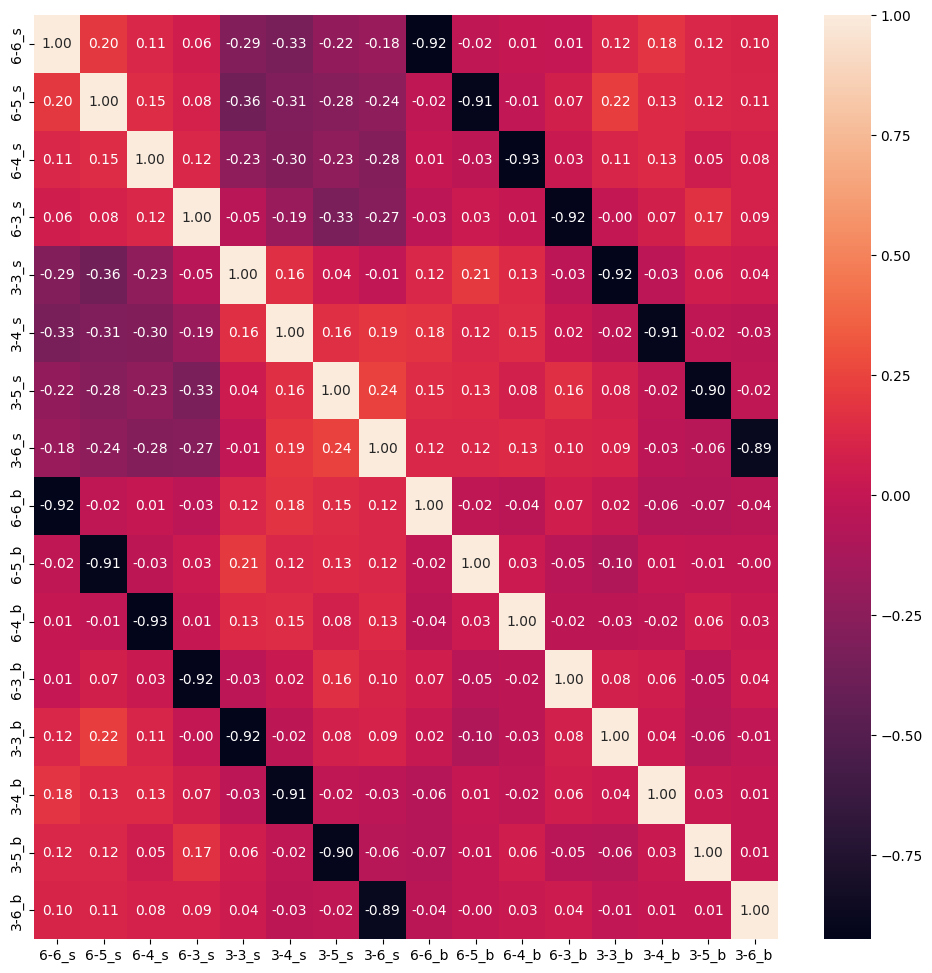

In [486]:
fig,ax = plt.subplots(1,1, figsize=(12,12))
sns.heatmap(
    df.loc[
        :, 
        [
            *d.CORE_PARTS["coef"]["ALL_CELLS"][4:8],
            *d.CORE_PARTS["coef"]["ALL_CELLS"][::-1][4:8],
            *d.CORE_PARTS["burnup"]["ALL_CELLS"][4:8],
            *d.CORE_PARTS["burnup"]["ALL_CELLS"][::-1][4:8],
        ]
    ].corr(),
    annot=True,
    fmt=".2f"
)

<Axes: >

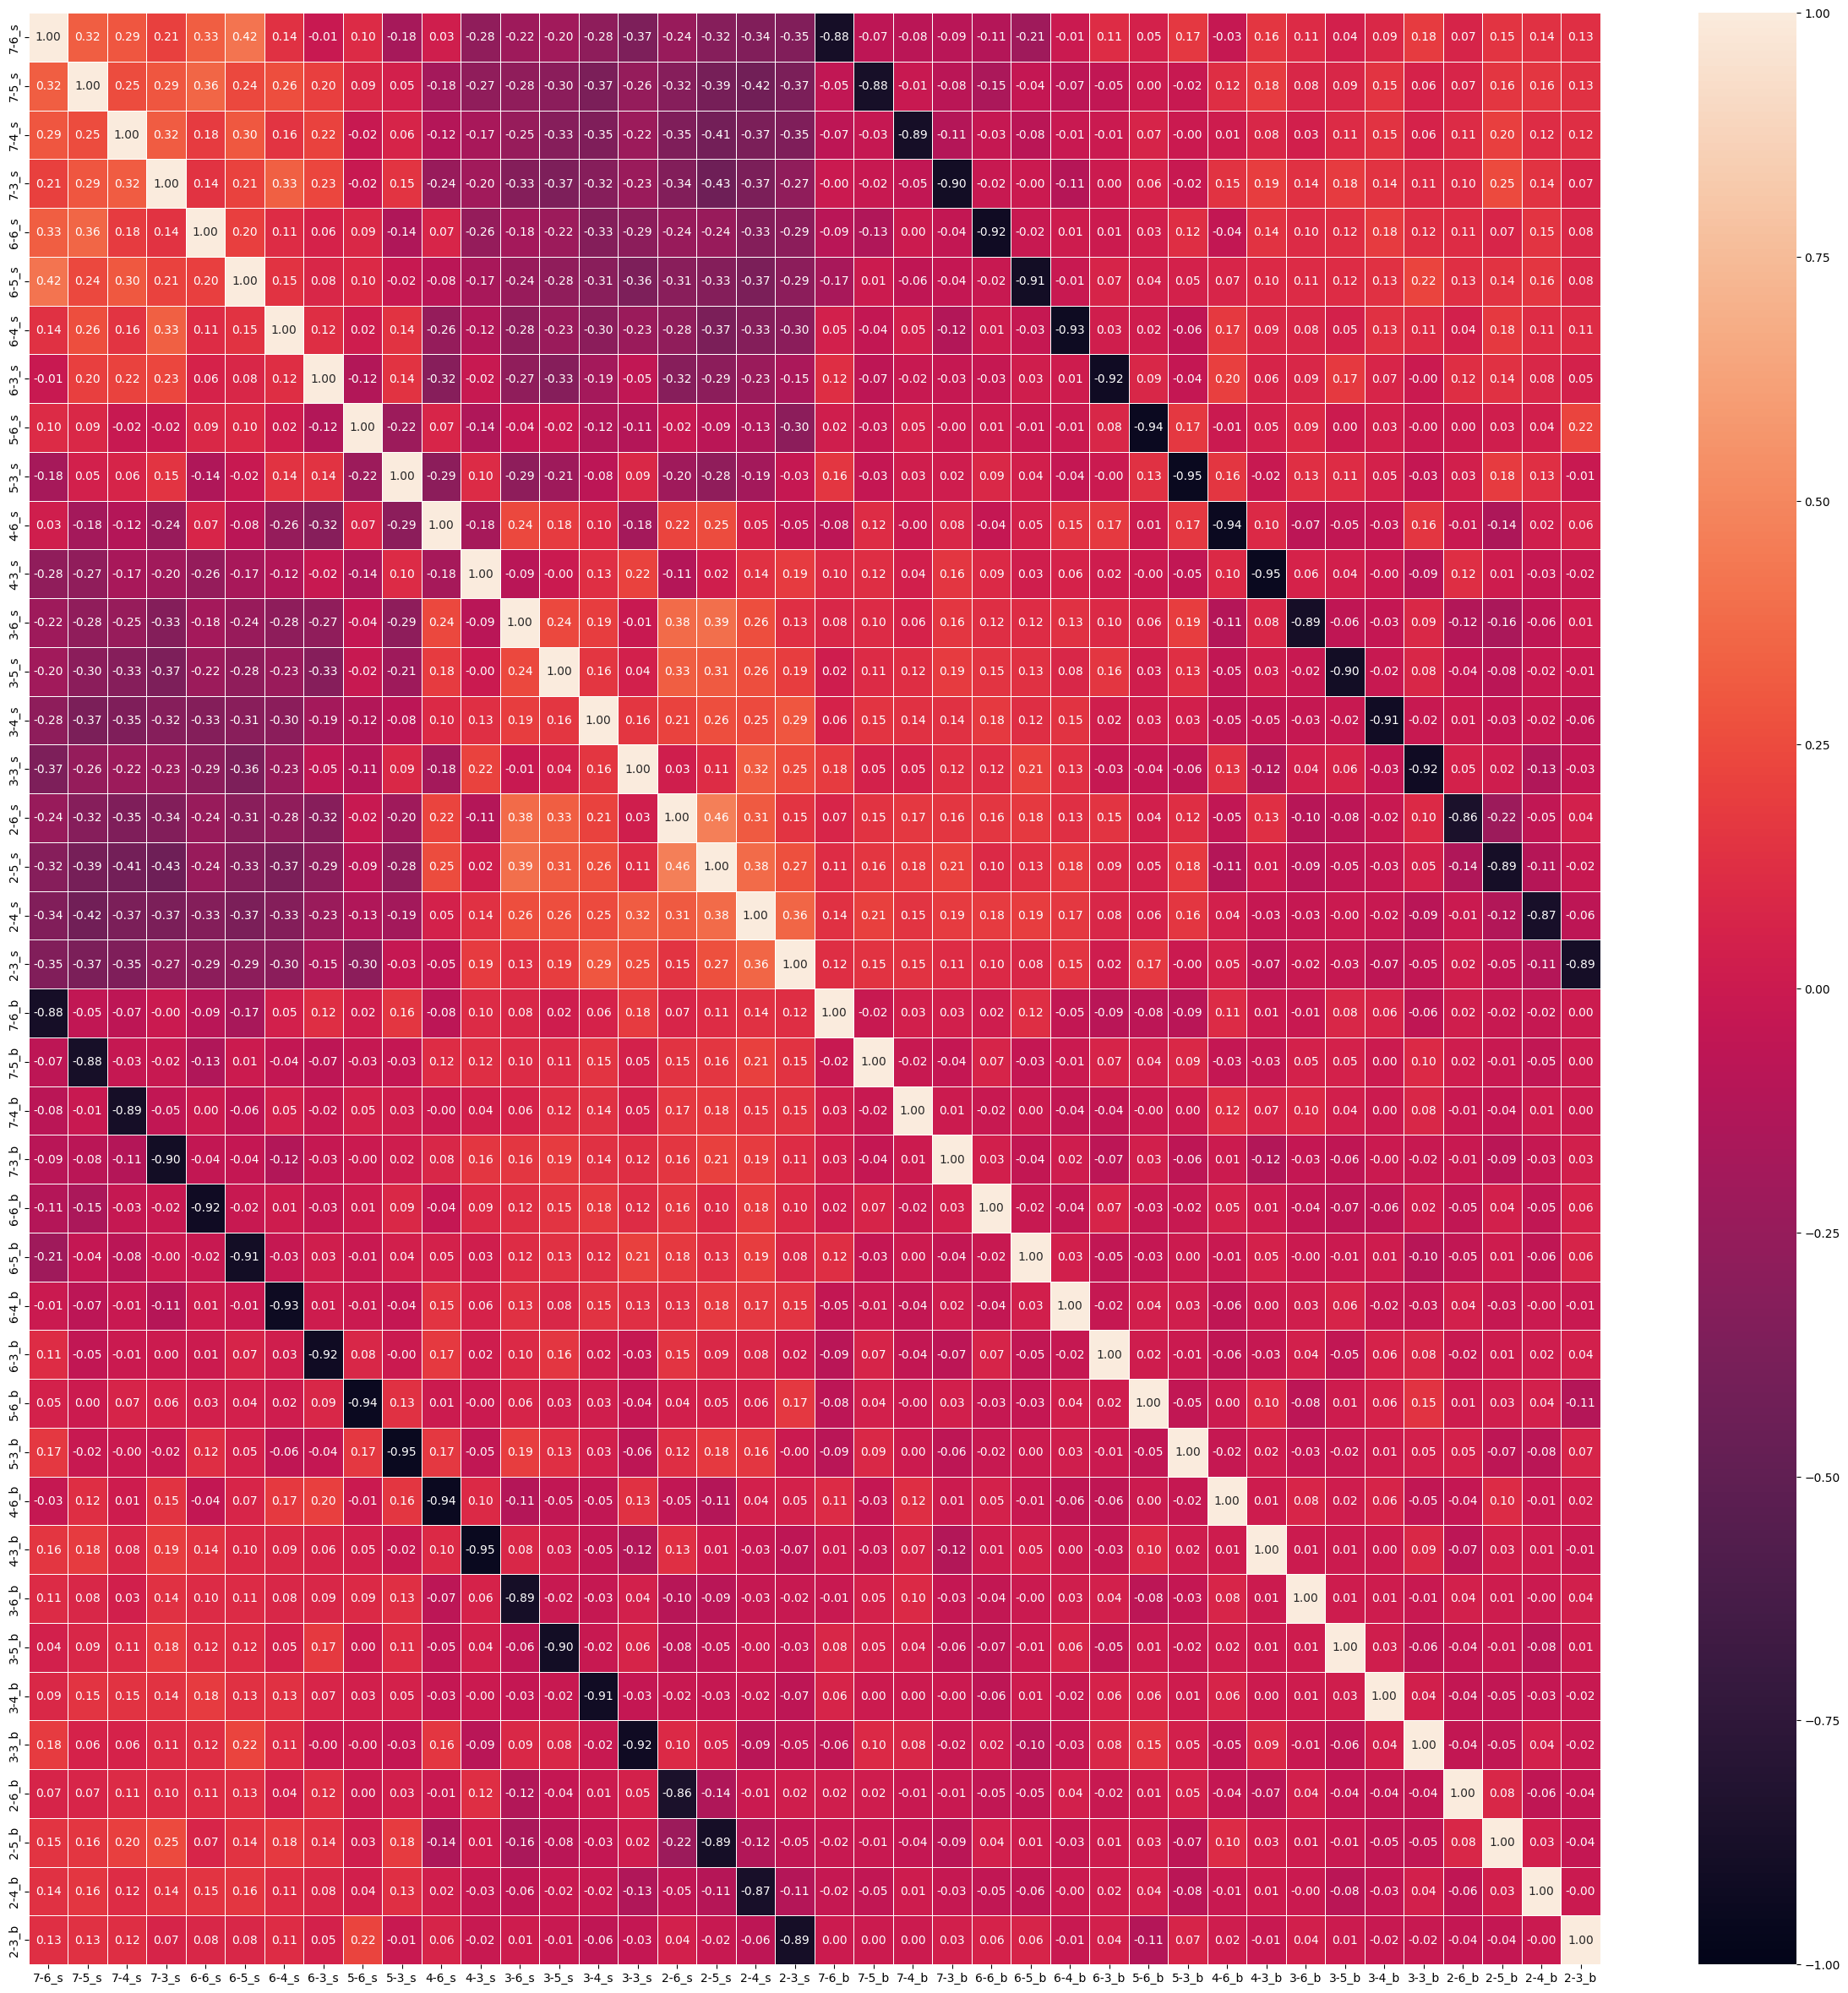

In [626]:
fig,ax = plt.subplots(1,1, figsize=(30,30))
sns.heatmap(
    df.loc[
        :, 
        [
            *d.CORE_PARTS["coef"]["ALL_CELLS"],
            *d.CORE_PARTS["burnup"]["ALL_CELLS"],
        ]
    ].corr(),
    annot=True,
    fmt=".2f",
    linewidth=.5,
    vmin=-1, 
    # vmax=.5
)

<Axes: >

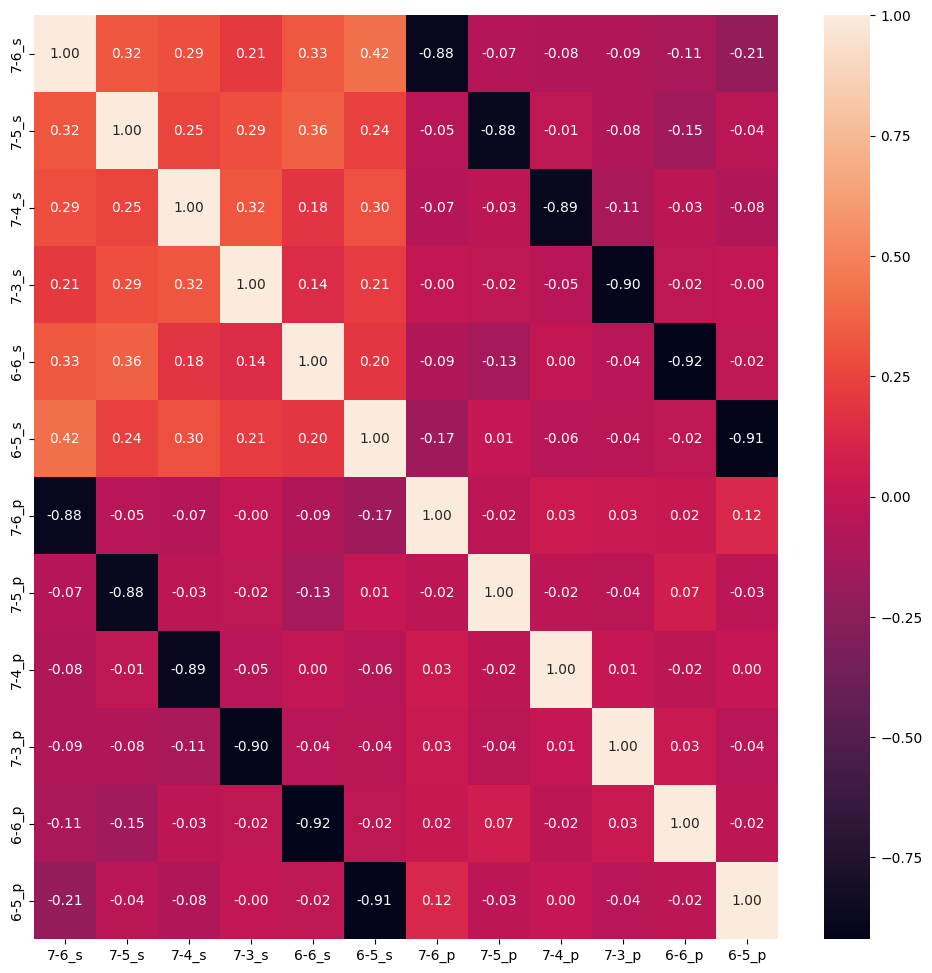

In [488]:
fig,ax = plt.subplots(1,1, figsize=(12,12))
sns.heatmap(
    df.loc[
        :, 
        [
            *d.CORE_PARTS["coef"]["ALL_CELLS"][:6],
            *d.CORE_PARTS["percentage"]["ALL_CELLS"][:6]
        ]
    ].corr(),
    annot=True,
    fmt=".2f"
)

In [489]:
part1 = random.sample(cells_p.to_list(), k=100)
part2 = random.sample(cells_p.to_list(), k=100)
mannwhitneyu(
    part1,
    part2
)

MannwhitneyuResult(statistic=5366.0, pvalue=0.3718209292822293)

In [490]:

wilcoxon(scipy.stats.zscore(cells1_p)), kendalltau(cells1_p.index, cells1_p)

(WilcoxonResult(statistic=45894.0, pvalue=0.9971955582338565),
 SignificanceResult(statistic=0.05042163982439804, pvalue=0.11919070055879831))

### Heat map and kendall tests on 7-3 -> 6-5 cells

<Axes: >

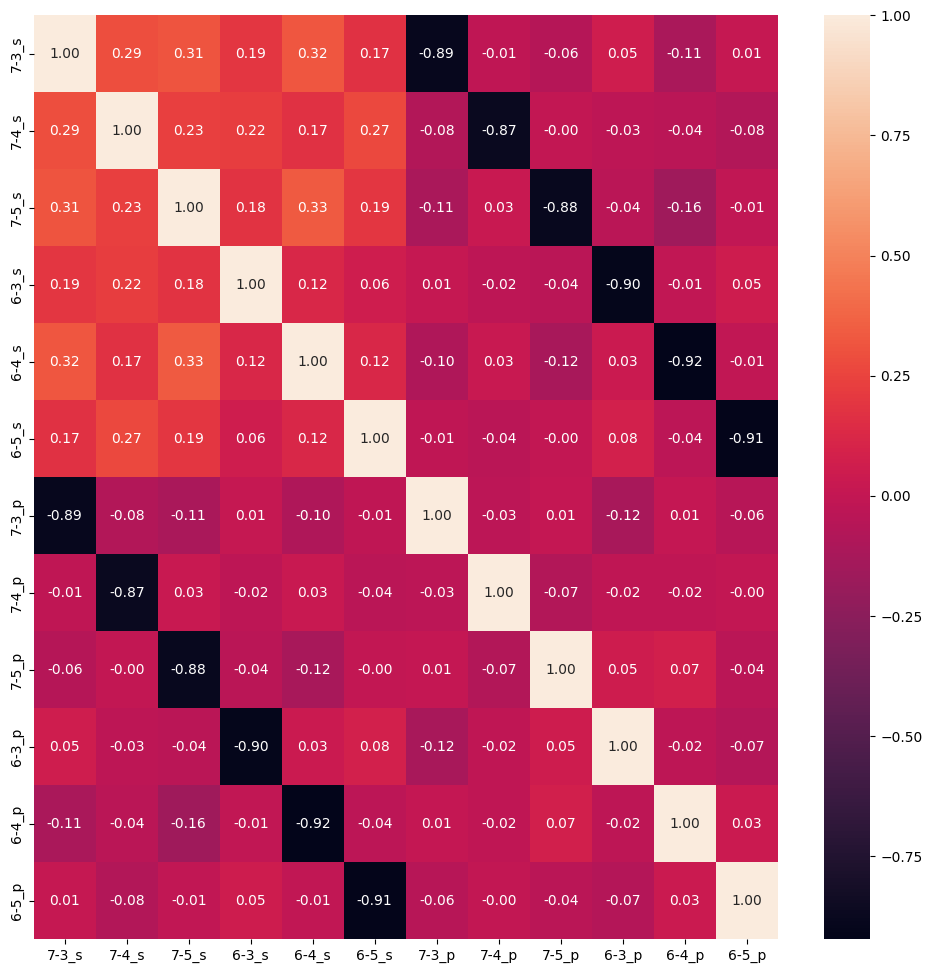

In [298]:
fig,ax = plt.subplots(1,1, figsize=(12,12))
sns.heatmap(
    df.loc[
        :, 
        [
            *["7-3_s", "7-4_s", "7-5_s", "6-3_s", "6-4_s", "6-5_s"],
            *["7-3_p", "7-4_p", "7-5_p", "6-3_p", "6-4_p", "6-5_p"]
        ]
    ].corr(method="spearman"),
    annot=True,
    fmt=".2f"
)

In [299]:
kendalltau(
    df.loc[:, "7-3_s"],
    df.loc[:, "7-4_s"]
), kendalltau(
    df.loc[:, "7-3_s"],
    df.loc[:, "7-5_s"]
), kendalltau(
    df.loc[:, "7-3_s"],
    df.loc[:, "6-3_s"]
), kendalltau(
    df.loc[:, "7-3_s"],
    df.loc[:, "6-4_s"]
), kendalltau(
    df.loc[:, "7-3_s"],
    df.loc[:, "6-5_s"]
), kendalltau(
    df.loc[:, "7-3_s"],
    df.loc[:, "7-3_p"]
), kendalltau(
    df.loc[:, "7-3_s"],
    df.loc[:, "7-4_p"]
), kendalltau(
    df.loc[:, "7-3_s"],
    df.loc[:, "7-5_p"]
),kendalltau(
    df.loc[:, "7-3_s"],
    df.loc[:, "6-3_p"]
), kendalltau(
    df.loc[:, "7-3_s"],
    df.loc[:, "6-4_p"]
), kendalltau(
    df.loc[:, "7-3_s"],
    df.loc[:, "6-5_p"]
)

(SignificanceResult(statistic=0.19967871485943778, pvalue=2.565427672501653e-06),
 SignificanceResult(statistic=0.21902008032128517, pvalue=2.4908228305120883e-07),
 SignificanceResult(statistic=0.12636144578313255, pvalue=0.002919571844482292),
 SignificanceResult(statistic=0.21927710843373496, pvalue=2.411551376836714e-07),
 SignificanceResult(statistic=0.11614457831325303, pvalue=0.006229456507130258),
 SignificanceResult(statistic=-0.7131633563736588, pvalue=2.6939832011839764e-63),
 SignificanceResult(statistic=-0.008193560863206908, pvalue=0.8469922009760122),
 SignificanceResult(statistic=-0.04434376100728346, pvalue=0.29637351280131785),
 SignificanceResult(statistic=0.03553927512612718, pvalue=0.4026449198500497),
 SignificanceResult(statistic=-0.07952829344955607, pvalue=0.06109262274588105),
 SignificanceResult(statistic=0.010089488038356279, pvalue=0.8121892423556776))

In [300]:
kendalltau(
    df.loc[:, "7-4_s"],
    df.loc[:, "7-5_s"]
), kendalltau(
    df.loc[:, "7-4_s"],
    df.loc[:, "6-3_s"]
), kendalltau(
    df.loc[:, "7-4_s"],
    df.loc[:, "6-4_s"]
), kendalltau(
    df.loc[:, "7-4_s"],
    df.loc[:, "6-5_s"]
), kendalltau(
    df.loc[:, "7-4_s"],
    df.loc[:, "7-3_p"]
), kendalltau(
    df.loc[:, "7-4_s"],
    df.loc[:, "7-4_p"]
), kendalltau(
    df.loc[:, "7-4_s"],
    df.loc[:, "7-5_p"]
), kendalltau(
    df.loc[:, "7-4_s"],
    df.loc[:, "6-3_p"]
), kendalltau(
    df.loc[:, "7-4_s"],
    df.loc[:, "6-4_p"]
), kendalltau(
    df.loc[:, "7-4_s"],
    df.loc[:, "6-5_p"]
)

(SignificanceResult(statistic=0.15379919678714862, pvalue=0.000291996170441755),
 SignificanceResult(statistic=0.14981526104417672, pvalue=0.0004179709656935296),
 SignificanceResult(statistic=0.11370281124497994, pvalue=0.00740756602958007),
 SignificanceResult(statistic=0.18136546184738958, pvalue=1.9412466321548863e-05),
 SignificanceResult(statistic=-0.05565463338015576, pvalue=0.18999313143798158),
 SignificanceResult(statistic=-0.6938821444743263, pvalue=5.053721401558719e-60),
 SignificanceResult(statistic=0.001028261124806573, pvalue=0.9806816688689932),
 SignificanceResult(statistic=-0.016452177996905168, pvalue=0.6984387436708488),
 SignificanceResult(statistic=-0.028437389778932173, pvalue=0.5030639451439011),
 SignificanceResult(statistic=-0.05198978231229445, pvalue=0.22082586981148067))

In [301]:
kendalltau(
    df.loc[:, "7-5_s"],
    df.loc[:, "6-3_s"]
), kendalltau(
    df.loc[:, "7-5_s"],
    df.loc[:, "6-4_s"]
), kendalltau(
    df.loc[:, "7-5_s"],
    df.loc[:, "6-5_s"]
), kendalltau(
    df.loc[:, "7-5_s"],
    df.loc[:, "7-3_p"]
), kendalltau(
    df.loc[:, "7-5_s"],
    df.loc[:, "7-4_p"]
), kendalltau(
    df.loc[:, "7-5_s"],
    df.loc[:, "7-5_p"]
), kendalltau(
    df.loc[:, "7-5_s"],
    df.loc[:, "6-3_p"]
), kendalltau(
    df.loc[:, "7-5_s"],
    df.loc[:, "6-4_p"]
), kendalltau(
    df.loc[:, "7-5_s"],
    df.loc[:, "6-5_p"]
)

(SignificanceResult(statistic=0.11749397590361448, pvalue=0.005653420329538504),
 SignificanceResult(statistic=0.22775903614457832, pvalue=8.130376594863813e-08),
 SignificanceResult(statistic=0.1300240963855422, pvalue=0.0021961031384665837),
 SignificanceResult(statistic=-0.07711958436049297, pvalue=0.0693591571618226),
 SignificanceResult(statistic=0.0182828867888813, pvalue=0.6667881741328276),
 SignificanceResult(statistic=-0.701145554477482, pvalue=3.0512505532282026e-61),
 SignificanceResult(statistic=-0.0267347892449709, pvalue=0.528974717781981),
 SignificanceResult(statistic=-0.11236785543155457, pvalue=0.008140922838849292),
 SignificanceResult(statistic=-0.0052054046567315835, pvalue=0.902435858488286))

In [302]:
kendalltau(
    df.loc[:, "6-3_s"],
    df.loc[:, "6-4_s"]
), kendalltau(
    df.loc[:, "6-3_s"],
    df.loc[:, "6-5_s"]
), kendalltau(
    df.loc[:, "6-3_s"],
    df.loc[:, "7-3_p"]
), kendalltau(
    df.loc[:, "6-3_s"],
    df.loc[:, "7-4_p"]
), kendalltau(
    df.loc[:, "6-3_s"],
    df.loc[:, "7-5_p"]
), kendalltau(
    df.loc[:, "6-3_s"],
    df.loc[:, "6-3_p"]
), kendalltau(
    df.loc[:, "6-3_s"],
    df.loc[:, "6-4_p"]
), kendalltau(
    df.loc[:, "6-3_s"],
    df.loc[:, "6-5_p"]
)

(SignificanceResult(statistic=0.08151004016064259, pvalue=0.05489134182551398),
 SignificanceResult(statistic=0.03839357429718876, pvalue=0.36586255105347965),
 SignificanceResult(statistic=0.011889269255576, pvalue=0.7794944307394581),
 SignificanceResult(statistic=-0.015326778555881158, pvalue=0.718141196211366),
 SignificanceResult(statistic=-0.03174756222840294, pvalue=0.4546914351540946),
 SignificanceResult(statistic=-0.7384200202517203, pvalue=1.0014335252588561e-67),
 SignificanceResult(statistic=-0.00980045636449075, pvalue=0.817475996500799),
 SignificanceResult(statistic=0.034766961966565264, pvalue=0.41293153359341994))

In [303]:
kendalltau(
    df.loc[:, "6-4_s"],
    df.loc[:, "6-5_s"]
), kendalltau(
    df.loc[:, "6-4_s"],
    df.loc[:, "7-3_p"]
), kendalltau(
    df.loc[:, "6-4_s"],
    df.loc[:, "7-4_p"]
), kendalltau(
    df.loc[:, "6-4_s"],
    df.loc[:, "7-5_p"]
), kendalltau(
    df.loc[:, "6-4_s"],
    df.loc[:, "6-3_p"]
), kendalltau(
    df.loc[:, "6-4_s"],
    df.loc[:, "6-4_p"]
), kendalltau(
    df.loc[:, "6-4_s"],
    df.loc[:, "6-5_p"]
)

(SignificanceResult(statistic=0.08208835341365463, pvalue=0.05319237979339255),
 SignificanceResult(statistic=-0.06625857622972355, pvalue=0.11868676308396717),
 SignificanceResult(statistic=0.0180258338990552, pvalue=0.6711963601817839),
 SignificanceResult(statistic=-0.08065423197701557, pvalue=0.057523802804366767),
 SignificanceResult(statistic=0.02043668985553064, pvalue=0.6303322312383559),
 SignificanceResult(statistic=-0.7613187299799321, pvalue=7.076649826974307e-72),
 SignificanceResult(statistic=-0.008290088897757706, pvalue=0.8452146863195868))

In [304]:
kendalltau(
    df.loc[:, "6-5_s"],
    df.loc[:, "7-3_p"]
), kendalltau(
    df.loc[:, "6-5_s"],
    df.loc[:, "7-4_p"]
), kendalltau(
    df.loc[:, "6-5_s"],
    df.loc[:, "7-5_p"]
), kendalltau(
    df.loc[:, "6-5_s"],
    df.loc[:, "6-3_p"]
), kendalltau(
    df.loc[:, "6-5_s"],
    df.loc[:, "6-4_p"]
), kendalltau(
    df.loc[:, "6-5_s"],
    df.loc[:, "6-5_p"]
)

(SignificanceResult(statistic=-0.010668209169868194, pvalue=0.8016413571968541),
 SignificanceResult(statistic=-0.0317781635047515, pvalue=0.4542353982516427),
 SignificanceResult(statistic=-0.0009639948045061622, pvalue=0.9818888502627922),
 SignificanceResult(statistic=0.05494770385685125, pvalue=0.19568205389285775),
 SignificanceResult(statistic=-0.024774268383679892, pvalue=0.5596151672710155),
 SignificanceResult(statistic=-0.7493854778042838, pvalue=1.0602855287519569e-69))

In [305]:
kendalltau(
    df.loc[:, "7-3_p"],
    df.loc[:, "7-4_p"]
), kendalltau(
    df.loc[:, "7-3_p"],
    df.loc[:, "7-5_p"]
), kendalltau(
    df.loc[:, "7-3_p"],
    df.loc[:, "6-3_p"]
), kendalltau(
    df.loc[:, "7-3_p"],
    df.loc[:, "6-4_p"]
), kendalltau(
    df.loc[:, "7-3_p"],
    df.loc[:, "6-5_p"]
)

(SignificanceResult(statistic=-0.02018156987963783, pvalue=0.6346397129651152),
 SignificanceResult(statistic=0.0046599820028281275, pvalue=0.9126303545713488),
 SignificanceResult(statistic=-0.08089086000771309, pvalue=0.05683057946685412),
 SignificanceResult(statistic=0.008869892180535466, pvalue=0.8345662068691232),
 SignificanceResult(statistic=-0.03531831476580353, pvalue=0.4056280918293579))

In [306]:
kendalltau(
    df.loc[:, "7-4_p"],
    df.loc[:, "7-5_p"]
), kendalltau(
    df.loc[:, "7-4_p"],
    df.loc[:, "6-3_p"]
), kendalltau(
    df.loc[:, "7-4_p"],
    df.loc[:, "6-4_p"]
), kendalltau(
    df.loc[:, "7-4_p"],
    df.loc[:, "6-5_p"]
)

(SignificanceResult(statistic=-0.04884711181058837, pvalue=0.25006916735528106),
 SignificanceResult(statistic=-0.012725958076969078, pvalue=0.7644422176499144),
 SignificanceResult(statistic=-0.007744713674543384, pvalue=0.8552968916184778),
 SignificanceResult(statistic=0.002956440702857649, pvalue=0.9444991405081478))

In [307]:
kendalltau(
    df.loc[:, "7-5_p"],
    df.loc[:, "6-3_p"]
), kendalltau(
    df.loc[:, "7-5_p"],
    df.loc[:, "6-4_p"]
), kendalltau(
    df.loc[:, "7-5_p"],
    df.loc[:, "6-5_p"]
)

(SignificanceResult(statistic=0.03216994472297211, pvalue=0.44877693563431154),
 SignificanceResult(statistic=0.04981280028923902, pvalue=0.2408427215979977),
 SignificanceResult(statistic=-0.029533695422905775, pvalue=0.48680094897266))

In [308]:
kendalltau(
    df.loc[:, "6-3_p"],
    df.loc[:, "6-4_p"]
), kendalltau(
    df.loc[:, "6-3_p"],
    df.loc[:, "6-5_p"]
)

(SignificanceResult(statistic=-0.016132919835611607, pvalue=0.7040472942163142),
 SignificanceResult(statistic=-0.04888003344748605, pvalue=0.24975756918314396))

In [309]:
kendalltau(
    df.loc[:, "6-4_p"],
    df.loc[:, "6-5_p"]
)

SignificanceResult(statistic=0.024937736003861996, pvalue=0.5570708226262551)

### Heat map and kendall tests on 3-6 -> 6-6 cells

<Axes: >

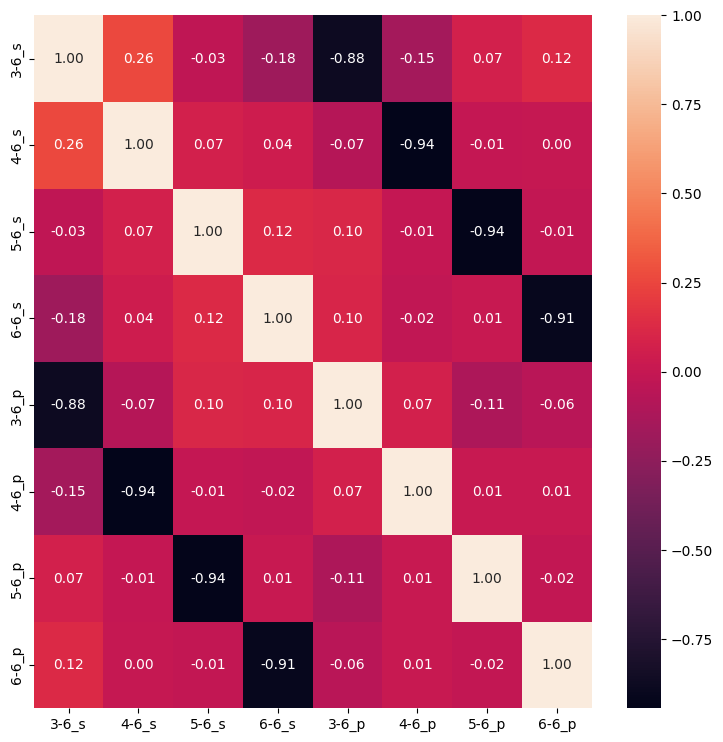

In [310]:
fig,ax = plt.subplots(1,1, figsize=(9,9))
sns.heatmap(
    df.loc[
        :, 
        [
            *["3-6_s", "4-6_s", "5-6_s", "6-6_s"],
            *["3-6_p", "4-6_p", "5-6_p", "6-6_p"]
        ]
    ].corr(method="spearman"),
    annot=True,
    fmt=".2f"
)

In [311]:
kendalltau(
    df.loc[:, "3-6_s"],
    df.loc[:, "4-6_s"]
), kendalltau(
    df.loc[:, "3-6_s"],
    df.loc[:, "5-6_s"]
), kendalltau(
    df.loc[:, "3-6_s"],
    df.loc[:, "6-6_s"]
), kendalltau(
    df.loc[:, "3-6_s"],
    df.loc[:, "3-6_p"]
), kendalltau(
    df.loc[:, "3-6_s"],
    df.loc[:, "4-6_p"]
), kendalltau(
    df.loc[:, "3-6_s"],
    df.loc[:, "5-6_p"]
), kendalltau(
    df.loc[:, "3-6_s"],
    df.loc[:, "6-6_p"]
)

(SignificanceResult(statistic=0.17712449799196792, pvalue=3.0238895757469678e-05),
 SignificanceResult(statistic=-0.01943775100401607, pvalue=0.647095778378259),
 SignificanceResult(statistic=-0.1197429718875502, pvalue=0.004799336695177009),
 SignificanceResult(statistic=-0.70296409576944, pvalue=1.4734704892502265e-61),
 SignificanceResult(statistic=-0.10054627379134054, pvalue=0.017898774481231804),
 SignificanceResult(statistic=0.04231869190830924, pvalue=0.31897335313295994),
 SignificanceResult(statistic=0.08070812383569646, pvalue=0.05732579298604158))

In [312]:
kendalltau(
    df.loc[:, "4-6_s"],
    df.loc[:, "5-6_s"]
), kendalltau(
    df.loc[:, "4-6_s"],
    df.loc[:, "6-6_s"]
), kendalltau(
    df.loc[:, "4-6_s"],
    df.loc[:, "3-6_p"]
), kendalltau(
    df.loc[:, "4-6_s"],
    df.loc[:, "4-6_p"]
), kendalltau(
    df.loc[:, "4-6_s"],
    df.loc[:, "5-6_p"]
), kendalltau(
    df.loc[:, "3-6_s"],
    df.loc[:, "6-6_p"]
)

(SignificanceResult(statistic=0.046746987951807234, pvalue=0.2709004527657174),
 SignificanceResult(statistic=0.02791967871485944, pvalue=0.510815770738789),
 SignificanceResult(statistic=-0.05051008129397384, pvalue=0.23423262759684083),
 SignificanceResult(statistic=-0.8001606787082682, pvalue=3.384795355239799e-79),
 SignificanceResult(statistic=-0.0038880499019782974, pvalue=0.9270473737208517),
 SignificanceResult(statistic=0.08070812383569646, pvalue=0.05732579298604158))

In [313]:
kendalltau(
    df.loc[:, "4-6_p"],
    df.loc[:, "3-6_p"]
), kendalltau(
    df.loc[:, "4-6_p"],
    df.loc[:, "5-6_p"]
), kendalltau(
    df.loc[:, "4-6_p"],
    df.loc[:, "6-6_p"]
)

(SignificanceResult(statistic=0.046790391409944974, pvalue=0.27056919679655733),
 SignificanceResult(statistic=0.0042743283220427995, pvalue=0.9198354663225672),
 SignificanceResult(statistic=0.0075836694827170386, pvalue=0.8582670355182798))

### Heat map and kendall tests on 3-3 -> 6-3 cells

<Axes: >

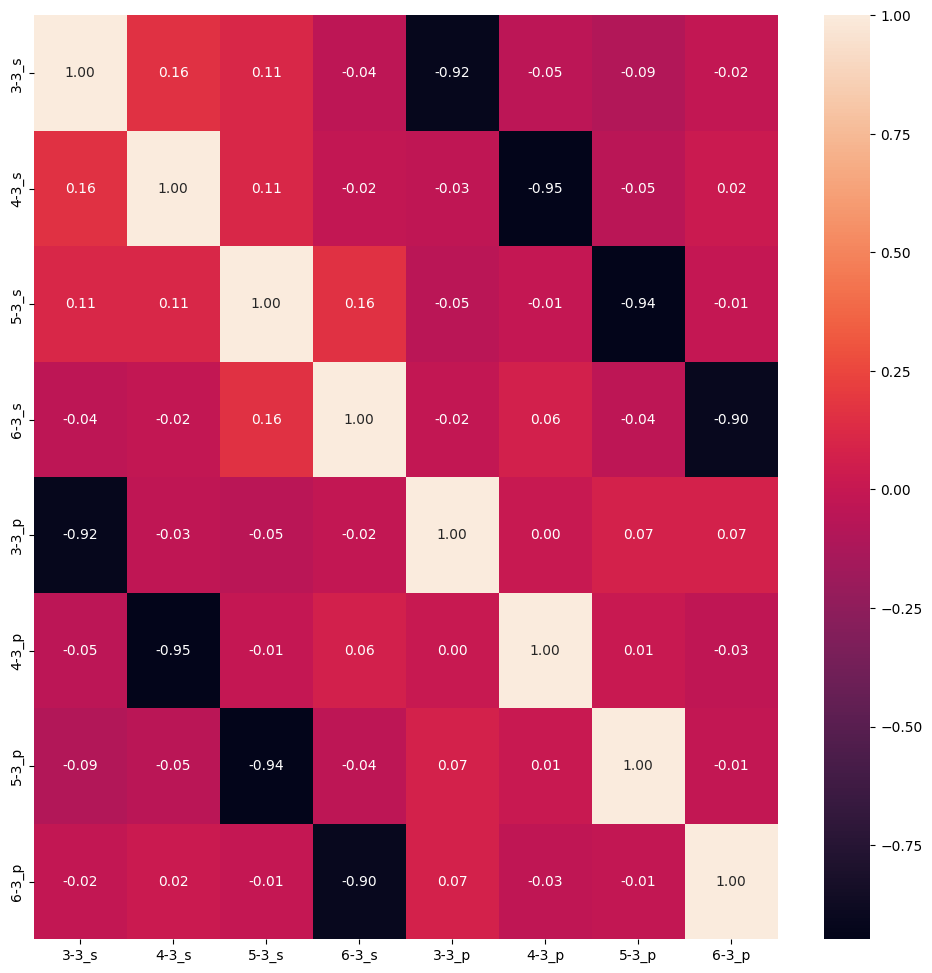

In [314]:
fig,ax = plt.subplots(1,1, figsize=(12,12))
sns.heatmap(
    df.loc[
        :, 
        [
            *["3-3_s", "4-3_s", "5-3_s", "6-3_s"],
            *["3-3_p", "4-3_p", "5-3_p", "6-3_p"]
        ]
    ].corr(method="spearman"),
    annot=True,
    fmt=".2f"
)

In [315]:
kendalltau(
    df.loc[:, "3-3_s"],
    df.loc[:, "4-3_s"]
), kendalltau(
    df.loc[:, "3-3_s"],
    df.loc[:, "5-3_s"]
), kendalltau(
    df.loc[:, "3-3_s"],
    df.loc[:, "6-3_s"]
), kendalltau(
    df.loc[:, "3-3_s"],
    df.loc[:, "3-3_p"]
), kendalltau(
    df.loc[:, "3-3_s"],
    df.loc[:, "4-3_p"]
), kendalltau(
    df.loc[:, "3-3_s"],
    df.loc[:, "5-3_p"]
), kendalltau(
    df.loc[:, "3-3_s"],
    df.loc[:, "6-3_p"]
)

(SignificanceResult(statistic=0.10554216867469882, pvalue=0.01292812193533892),
 SignificanceResult(statistic=0.0716144578313253, pvalue=0.09166620080269505),
 SignificanceResult(statistic=-0.02612048192771085, pvalue=0.5384272270168049),
 SignificanceResult(statistic=-0.7558518780912472, pvalue=7.001632226861659e-71),
 SignificanceResult(statistic=-0.030686674846192342, pvalue=0.46989775861036365),
 SignificanceResult(statistic=-0.06098677801528731, pvalue=0.1509425776536609),
 SignificanceResult(statistic=-0.014010057825489556, pvalue=0.7414604969567863))

In [316]:
kendalltau(
    df.loc[:, "5-3_s"],
    df.loc[:, "4-3_s"]
), kendalltau(
    df.loc[:, "5-3_s"],
    df.loc[:, "6-3_s"]
), kendalltau(
    df.loc[:, "5-3_s"],
    df.loc[:, "3-3_p"]
), kendalltau(
    df.loc[:, "5-3_s"],
    df.loc[:, "4-3_p"]
), kendalltau(
    df.loc[:, "5-3_s"],
    df.loc[:, "5-3_p"]
), kendalltau(
    df.loc[:, "5-3_s"],
    df.loc[:, "6-3_p"]
)

(SignificanceResult(statistic=0.0726425702811245, pvalue=0.08710188646302999),
 SignificanceResult(statistic=0.10175100401606427, pvalue=0.016554608187182535),
 SignificanceResult(statistic=-0.033095027819842915, pvalue=0.43574588818470505),
 SignificanceResult(statistic=-0.006779987845598518, pvalue=0.8731465340557834),
 SignificanceResult(statistic=-0.7989332184257659, pvalue=5.744449430679573e-79),
 SignificanceResult(statistic=-0.007197827873646012, pvalue=0.8654032740006157))

In [317]:
kendalltau(
    df.loc[:, "4-3_p"],
    df.loc[:, "3-3_p"]
), kendalltau(
    df.loc[:, "4-3_p"],
    df.loc[:, "5-3_p"]
), kendalltau(
    df.loc[:, "4-3_p"],
    df.loc[:, "6-3_p"]
)

(SignificanceResult(statistic=0.0024422771048827393, pvalue=0.9541397076672129),
 SignificanceResult(statistic=0.009383787259185185, pvalue=0.8251267712923935),
 SignificanceResult(statistic=-0.019796570953658863, pvalue=0.6411250194253069))

# Data Standartization

In [627]:
from sklearn.preprocessing import StandardScaler

In [628]:
ss_data = StandardScaler().fit_transform(
  df.loc[:, ["7-6_s", "5-3_s"]]  
) 

<Axes: ylabel='Density'>

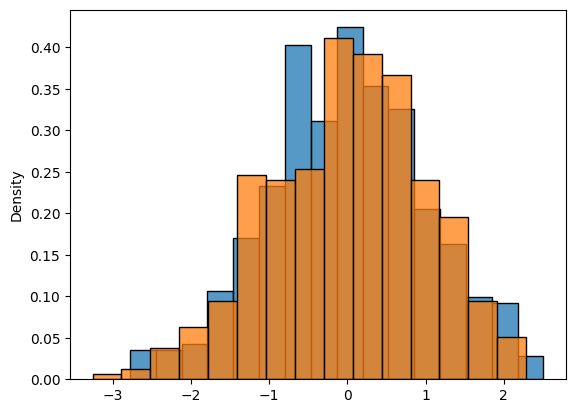

In [635]:
sns.histplot(ss_data[:, 0], stat="density")
sns.histplot(ss_data[:, 1], stat="density")